<a href="https://colab.research.google.com/github/Chanchal-Gupta/Yulu_CaseStudy/blob/main/Yulu%20Business%20Case%20study_Chanchal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chisquare, chi2_contingency, norm, ttest_1samp, ttest_ind, f_oneway, expon
import scipy.stats as stats

In [ ]:
data = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089')

In [ ]:
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


# BASIC INFORMATION

In [ ]:
data.isna().sum()/len(data)*100
#No null values are observed

datetime      0.0
season        0.0
holiday       0.0
workingday    0.0
weather       0.0
temp          0.0
atemp         0.0
humidity      0.0
windspeed     0.0
casual        0.0
registered    0.0
count         0.0
dtype: float64

In [ ]:
data.info()
#There are No null values observed in any of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
data.describe(include = 'object')
#Yulu Dataset has information from 01st Jan 2011 to 19th Dec 2012 (~ 2years)

,datetime
count,10886
unique,10886
top,2011-01-01 00:00:00
freq,1


In [ ]:
data.duplicated().sum()
#There are no duplicate record in the dataset, check again

0

# Data Types Conversion

In [ ]:
data.dtypes
#datetime should be in DATETIME format, and
#columns like holiday, workingday, season and weather need to be converted into object

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [ ]:
data['datetime'] = pd.to_datetime(data['datetime'])
data.dtypes
#Conversion of datetime column into Datetime

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [ ]:
def holiday_mapping(holiday):
    if holiday == 1:
        return 'Yes'
    else:
        return 'No'

def workingday_mapping(workingday):
    if workingday == 1:
        return 'Yes'
    else:
        return 'No'

def weather_mapping(weather):
    if weather == 1:
        return 'Clear'
    elif weather == 2:
        return 'Mist and Cloudy'
    elif weather == 3:
        return 'Light rain'
    elif weather == 4:
        return 'Heavy rain'

def season_mapping(season):
    if season == 1:
        return 'Spring'
    elif season == 2:
        return 'Summer'
    elif season == 3:
        return 'Fall'
    elif season == 4:
        return 'Winter'


In [ ]:
data['weather'] = data['weather'].apply(weather_mapping)
data['season'] = data['season'].apply(season_mapping)
data['workingday'] = data['workingday'].apply(workingday_mapping)
data['holiday'] = data['holiday'].apply(holiday_mapping)



In [ ]:
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,Spring,No,No,Clear,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,Spring,No,No,Clear,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,Spring,No,No,Clear,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,Spring,No,No,Clear,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,Spring,No,No,Clear,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,No,Yes,Clear,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,Winter,No,Yes,Clear,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,Winter,No,Yes,Clear,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,Winter,No,Yes,Clear,13.94,17.425,61,6.0032,12,117,129


# Unique Values in each columns

In [ ]:
data.season.unique() #4 unique values

array(['Spring', 'Summer', 'Fall', 'Winter'], dtype=object)

In [ ]:
data.holiday.unique() #2 unique values

array(['No', 'Yes'], dtype=object)

In [ ]:
data.workingday.unique() #2 unique values

array(['No', 'Yes'], dtype=object)

In [ ]:
data.weather.unique() #4 categories

array(['Clear', 'Mist and Cloudy', 'Light rain', 'Heavy rain'],
      dtype=object)

In [ ]:
data.temp.nunique()
#Total 49 unique values

49

In [ ]:
data.atemp.nunique()
#Total 60 unique values

60

In [ ]:
data.humidity.nunique()
#Total 89 unique values

89

In [ ]:
data.windspeed.nunique()
#Total 28 unique values

28

In [ ]:
data.casual.nunique()
#Total 309 unique values

309

In [ ]:
data.registered.nunique()
#Total 731 unique values

731

In [ ]:
data['count'].nunique()
#Total 822 unique values

822

In [ ]:
data.dtypes

datetime      datetime64[ns]
season                object
holiday               object
workingday            object
weather               object
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

# OUTLIERS DETECTION BY BOXPLOT

<AxesSubplot:xlabel='Count', ylabel='count'>

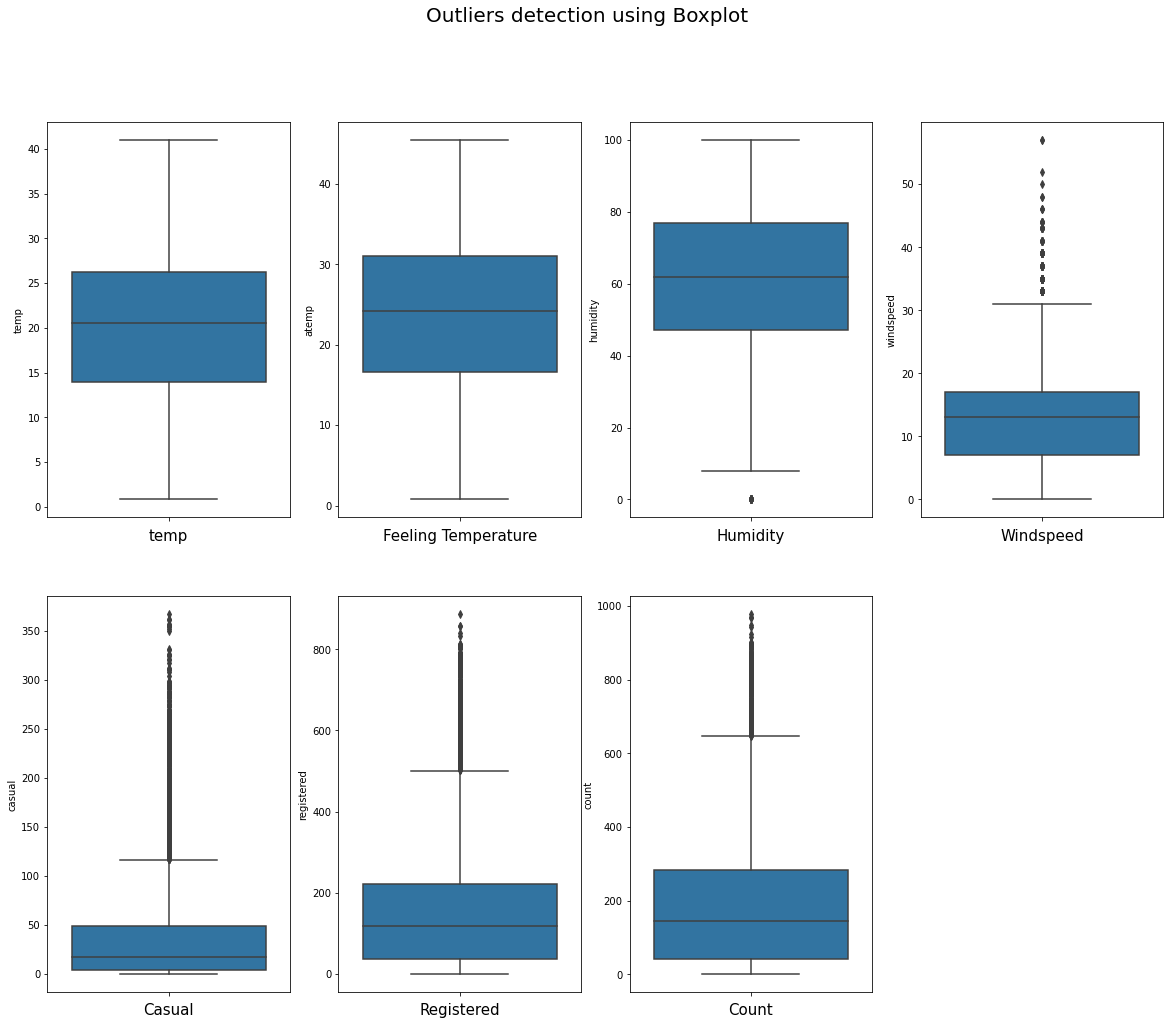

In [ ]:
plt.figure(figsize = (20, 16))
plt.suptitle('Outliers detection using Boxplot', fontsize = 20)

plt.subplot(2, 4, 1)
plt.xlabel('temp', fontsize = 15)
sns.boxplot(y = 'temp', data = data)

plt.subplot(2, 4, 2)
plt.xlabel('Feeling Temperature', fontsize = 15)
sns.boxplot(y = 'atemp', data = data)

plt.subplot(2, 4, 3)
plt.xlabel('Humidity', fontsize = 15)
sns.boxplot(y = 'humidity', data = data)

plt.subplot(2, 4, 4)
plt.xlabel('Windspeed', fontsize = 15)
sns.boxplot(y = 'windspeed', data = data)

plt.subplot(2, 4, 5)
plt.xlabel('Casual', fontsize = 15)
sns.boxplot(y = 'casual', data = data)

plt.subplot(2, 4, 6)
plt.xlabel('Registered', fontsize = 15)
sns.boxplot(y = 'registered', data = data)

plt.subplot(2, 4, 7)
plt.xlabel('Count', fontsize = 15)
sns.boxplot(y = 'count', data = data)

#There are outliers in windspeed, casual, registered and count data

# Statistics for Outliers in COUNT, CASUAL AND REGISTERED Data Column


Upper Whisker: 647.0 
Lower Whisker:  -321.0 
Max value:  977 
Min value:  1 
Mean value:  191.57413191254824 
Median value:  145.0
Total Value above 647.0 are Outliers


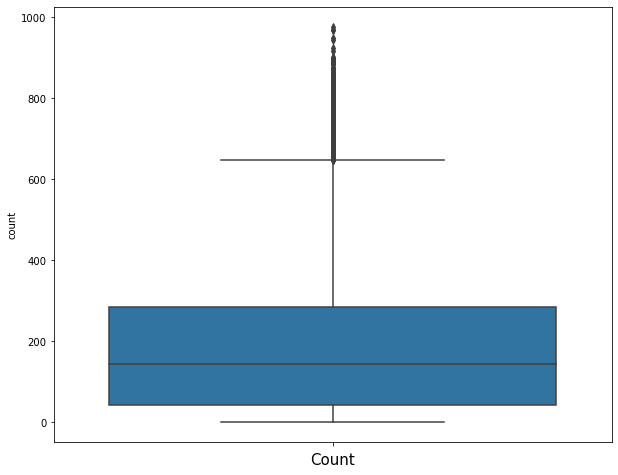

In [ ]:
#Outlier detection For count data

Q1 = np.percentile(data['count'], 25)
Q3 = np.percentile(data['count'], 75)
IQR = Q3 - Q1
Upper_Whisker = Q3 + 1.5*IQR
Lower_Whisker = Q1 - 1.5*IQR
Min_count = data['count'].min()
Max_count = data['count'].max()
Mean_count = data['count'].mean()
Median_count = data['count'].median()

print('Upper Whisker:',Upper_Whisker, '\nLower Whisker: ',Lower_Whisker, '\nMax value: ', Max_count,
      '\nMin value: ', Min_count, '\nMean value: ', Mean_count, '\nMedian value: ', Median_count)
print(f'Total Value above {Upper_Whisker} are Outliers')

plt.figure(figsize = (10, 8))
plt.xlabel('Count', fontsize = 15)
sns.boxplot(y = 'count', data = data)
plt.show()

Upper Whisker: 501.0 
Lower Whisker:  -243.0 
Max value:  886 
Min value:  0 
Mean value:  155.5521771082124 
Median value:  118.0
Total value above 501.0 are Outliers


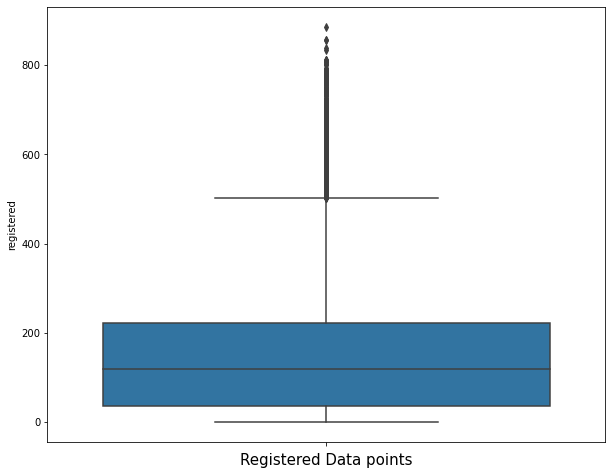

In [ ]:
#Outlier detection For registered data

Q1 = np.percentile(data['registered'], 25)
Q3 = np.percentile(data['registered'], 75)
IQR = Q3 - Q1
Upper_Whisker = Q3 + 1.5*IQR
Lower_Whisker = Q1 - 1.5*IQR
Min_count = data['registered'].min()
Max_count = data['registered'].max()
Mean_count = data['registered'].mean()
Median_count = data['registered'].median()
print('Upper Whisker:',Upper_Whisker, '\nLower Whisker: ',Lower_Whisker, '\nMax value: ', Max_count,
      '\nMin value: ', Min_count, '\nMean value: ', Mean_count, '\nMedian value: ', Median_count)
print(f'Total value above {Upper_Whisker} are Outliers')
plt.figure(figsize = (10, 8))
plt.xlabel('Registered Data points', fontsize = 15)

sns.boxplot(y = 'registered', data = data)
plt.show()

Upper Whisker: 116.5 
Lower Whisker:  -63.5 
Max value:  367 
Min value:  0 
Mean value:  36.02195480433584 
Median value:  17.0
Total value above 116.5 are Outliers


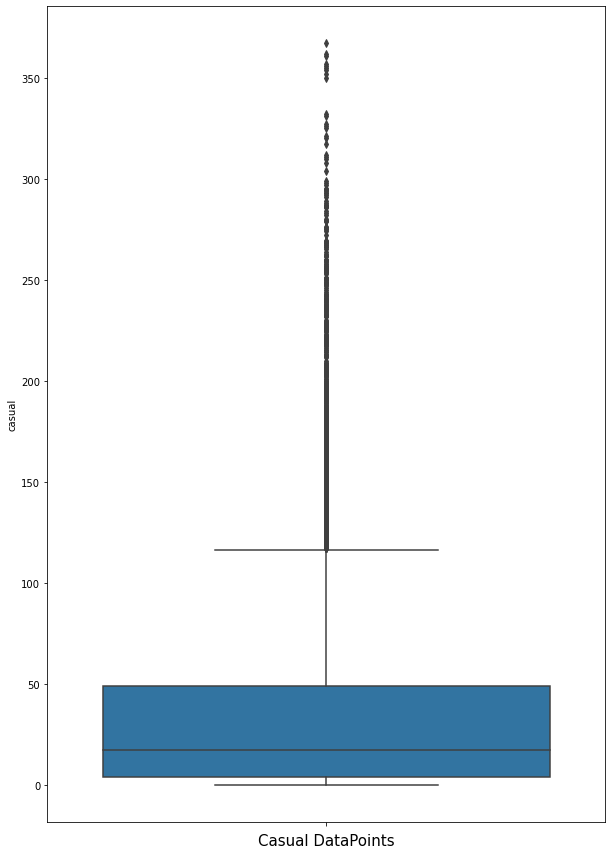

In [ ]:
#Outlier detection For casual data

Q1 = np.percentile(data['casual'], 25)
Q3 = np.percentile(data['casual'], 75)
IQR = Q3 - Q1
Upper_Whisker = Q3 + 1.5*IQR
Lower_Whisker = Q1 - 1.5*IQR
Min_count = data['casual'].min()
Max_count = data['casual'].max()
Mean_count = data['casual'].mean()
Median_count = data['casual'].median()
print('Upper Whisker:',Upper_Whisker, '\nLower Whisker: ',Lower_Whisker, '\nMax value: ', Max_count,
      '\nMin value: ', Min_count, '\nMean value: ', Mean_count, '\nMedian value: ', Median_count)
print(f'Total value above {Upper_Whisker} are Outliers')
plt.figure(figsize = (10, 15))
plt.xlabel('Casual DataPoints', fontsize = 15)
sns.boxplot(y = 'casual', data = data)
plt.show()

In [ ]:
Count_Outliers_percentage = data[data['count']>647].count()/len(data)*100
Casual_Outliers_percentage = data[data['casual']>116.5].count()/len(data)*100
Registered_Outliers_percentage = data[data['registered']>501].count()/len(data)*100

print('OBSERVATIONS:')
print(f'Total Percentage of Outliers in "COUNT", column is',round(Count_Outliers_percentage['count'], 2))
print(f'Total Percentage of Outliers in "CASUAL", column is',round(Casual_Outliers_percentage['casual'], 2))
print(f'Total Percentage of Outliers in "REGISTERED", column is',round(Registered_Outliers_percentage['registered'], 2))

OBSERVATIONS:
Total Percentage of Outliers in "COUNT", column is 2.76
Total Percentage of Outliers in "CASUAL", column is 6.88
Total Percentage of Outliers in "REGISTERED", column is 3.89


# UNIVARIATE ANALYSIS

'\n\nOBSERVATION: \nThe distribution plot of all variables are skewed, hence they are not normally distributed\n\n'

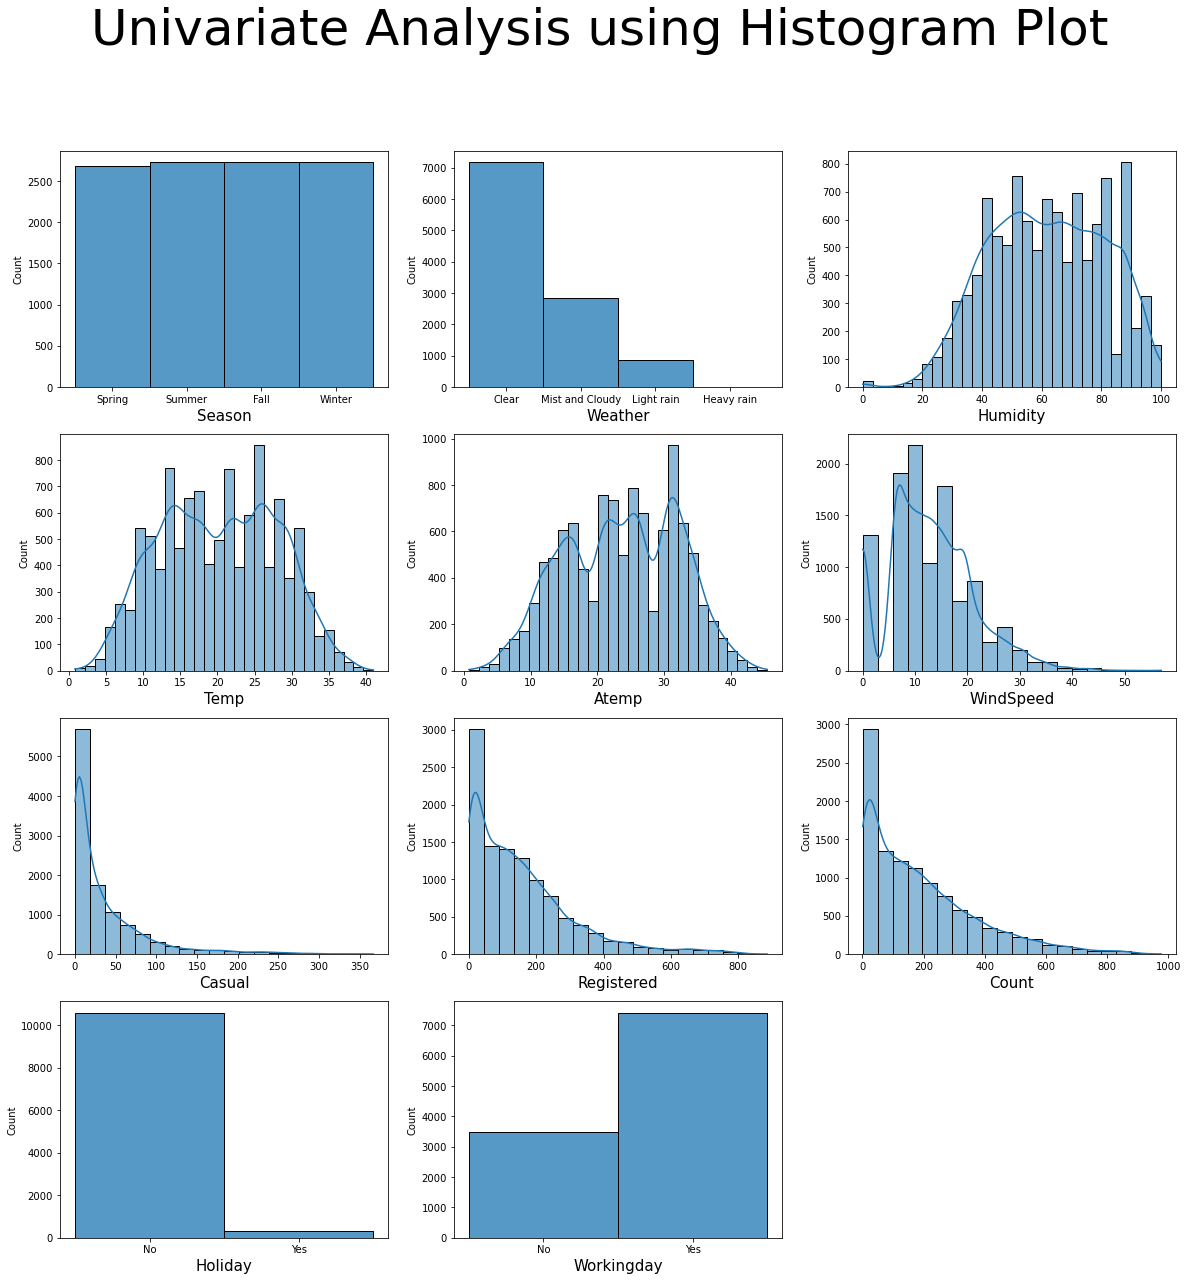

In [ ]:
plt.figure(figsize = (20, 20))
plt.suptitle('Univariate Analysis using Histogram Plot', fontsize = 50)

plt.subplot(4, 3, 1)
plt.xlabel('Season', fontsize = 15)
sns.histplot(x = "season", data = data)

plt.subplot(4, 3, 2)
plt.xlabel('Weather', fontsize = 15)
sns.histplot(x = "weather", data = data)

plt.subplot(4, 3, 3)
plt.xlabel('Humidity', fontsize = 15)
sns.histplot(x = "humidity", bins = 30, data = data, kde = True)

plt.subplot(4, 3, 4)
plt.xlabel('Temp', fontsize = 15)
sns.histplot(x = "temp", bins = 30, data = data, kde = True)

plt.subplot(4, 3, 5)
plt.xlabel('Atemp', fontsize = 15)
sns.histplot(x = "atemp",bins = 30, data = data, kde = True)

plt.subplot(4, 3, 6)
plt.xlabel('WindSpeed', fontsize = 15)
sns.histplot(x = "windspeed", bins = 20, data = data, kde = True)

plt.subplot(4, 3, 7)
plt.xlabel('Casual', fontsize = 15)
sns.histplot(x = "casual", bins = 20, data = data, kde = True)

plt.subplot(4, 3, 8)
plt.xlabel('Registered', fontsize = 15)
sns.histplot(x = "registered", bins = 20, data = data, kde = True)

plt.subplot(4, 3, 9)
plt.xlabel('Count', fontsize = 15)
sns.histplot(x = "count", bins = 20, data = data, kde = True)

plt.subplot(4, 3, 10)
plt.xlabel('Holiday', fontsize = 15)
sns.histplot(x = "holiday", data = data)

plt.subplot(4, 3, 11)
plt.xlabel('Workingday', fontsize = 15)
sns.histplot(x = "workingday", data = data)

'''

OBSERVATION:
1. The distribution plot of all variables are skewed, hence they are not normally distributed
2. The number of bike riders is same in all season
3. Weather and Holiday has a significant effect on the count of bike riders
4. The number of bike riders is more on working days.


'''


In [ ]:
Season_data = (data['season'].value_counts()/data['season'].count())*100
Weather_data = (data['weather'].value_counts()/data['weather'].count())*100
Workingday_data=(data['workingday'].value_counts()/data['workingday'].count())*100
Holiday_data = (data['holiday'].value_counts()/data['holiday'].count())*100

print(Season_data)
print()
print(Weather_data)
print()
print(Workingday_data)
print()
print(Holiday_data)

'''
OBSERVATION:
-> The number of bike riders in all season is approximetely same
-> Around 67% rides when the weather is Clear and almost none when there is heavy rains.
-> People mostly ride during working days and very less during holidays or weekends
As per data, 68% ride during working days and 97% ride when there is NO Holidays

'''



Winter    25.114826
Summer    25.105640
Fall      25.105640
Spring    24.673893
Name: season, dtype: float64

Clear              66.066507
Mist and Cloudy    26.033437
Light rain          7.890869
Heavy rain          0.009186
Name: weather, dtype: float64

Yes    68.087452
No     31.912548
Name: workingday, dtype: float64

No     97.14312
Yes     2.85688
Name: holiday, dtype: float64


'\n-> The number of bike riders in all season is approximetely same\n-> Around 67% ride when the weather is Clear and almost none rides during when there is heavy rains.\n-> People mostly ride during working days and very less during holidays or weekends\nAs per data, 68% ride during working days and 97% ride when there is NO Holidays\n\n'

In [ ]:
print('The mean of the temperature is',round(data['temp'].mean()),'degree Celsius')
print('The mean of the Feeling temperature is',round(data['atemp'].mean()),'degree Celsius')
print('The mean of the Humidity is',round(data['humidity'].mean()),'%')

The mean of the temperature is 20 degree Celsius
The mean of the Feeling temperature is 24 degree Celsius
The mean of the Humidity is 62 %


# BIVARIATE ANALYSIS

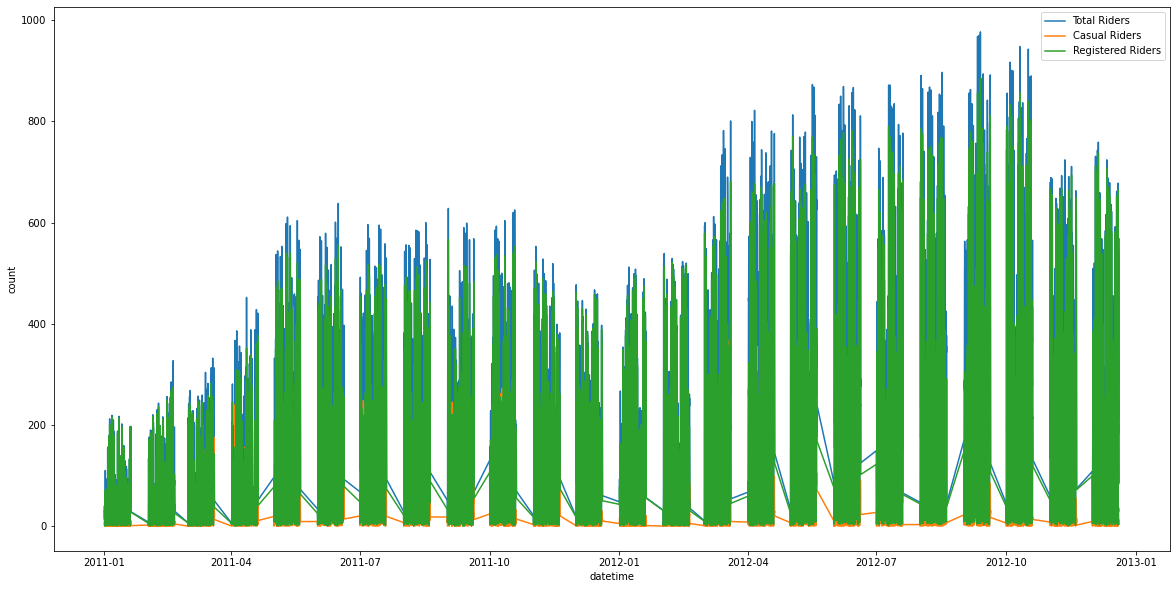

In [ ]:
#COMBINED LINE CHART

plt.figure(figsize = (20, 10)) #this code shud always be 1st
sns.lineplot(x = 'datetime', y = 'count', data = data, label = 'Total Riders')


sns.lineplot(x = 'datetime', y = 'casual', data = data, label = 'Casual Riders')
sns.lineplot(x = 'datetime', y = 'registered', data = data, label = 'Registered Riders')
plt.show()

'''
OBSERVATION:

-> From the plot, there is an increase in trend in number of total, casual and registered bike riders
-> The number of bike riders increase in spring to summer season then drop at mid-fall to Winter and then again increases.

'''

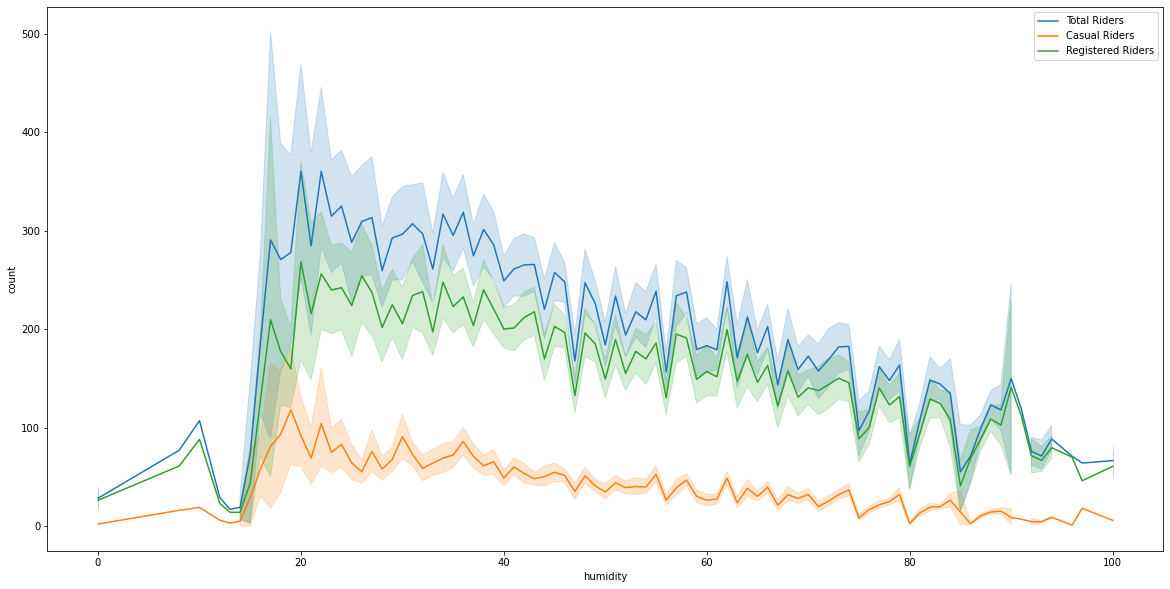

'\nOBSERVATION:\n\n'

In [ ]:
#COMBINED LINE CHART

plt.figure(figsize = (20, 10)) #this code shud always be 1st
sns.lineplot(x = 'humidity', y = 'count', data = data, label = 'Total Riders')


sns.lineplot(x = 'humidity', y = 'casual', data = data, label = 'Casual Riders')
sns.lineplot(x='humidity',y='registered',data = data, label='Registered Riders')
plt.show()



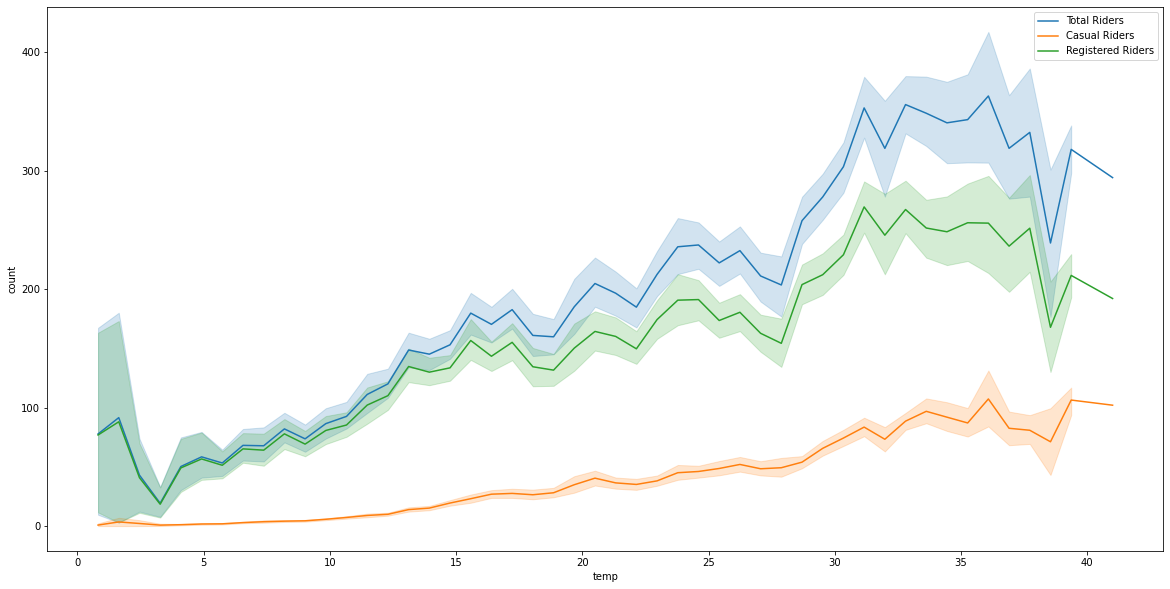

'\nOBSERVATION:\n\n'

In [ ]:
#COMBINED LINE CHART

plt.figure(figsize = (20, 10)) #this code shud always be 1st
sns.lineplot(x = 'temp', y = 'count', data = data, label = 'Total Riders')

sns.lineplot(x = 'temp', y = 'casual', data = data, label = 'Casual Riders')
sns.lineplot(x = 'temp', y = 'registered', data = data, label = 'Registered Riders')
plt.show()



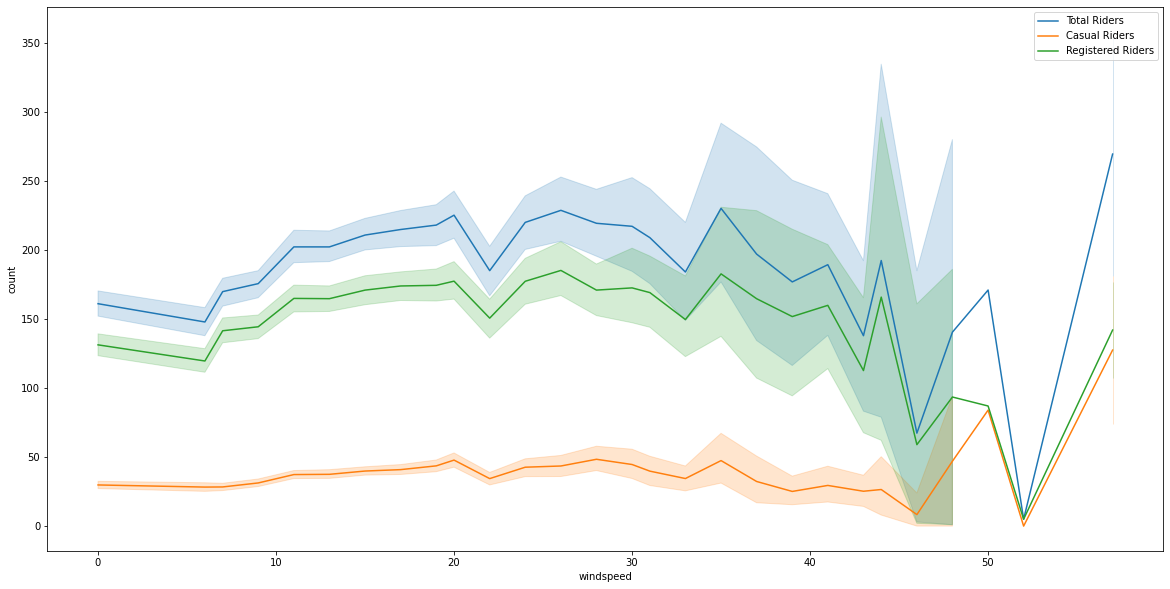

'\nOBSERVATION:\n\n'

In [ ]:
#COMBINED LINE CHART

plt.figure(figsize = (20, 10)) #this code shud always be 1st
sns.lineplot(x = 'windspeed', y = 'count', data = data, label = 'Total Riders')

sns.lineplot(x = 'windspeed', y = 'casual', data = data, label = 'Casual Riders')
sns.lineplot(x ='windspeed',y ='registered', data=data,label='Registered Riders')
plt.show()



# CORELATION DATA

C:\Users\Chanchal Gupta\AppData\Local\Temp\ipykernel_13816\3584284474.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(method = 'pearson'), square = True, annot = True, cmap = 'coolwarm')


<AxesSubplot:>

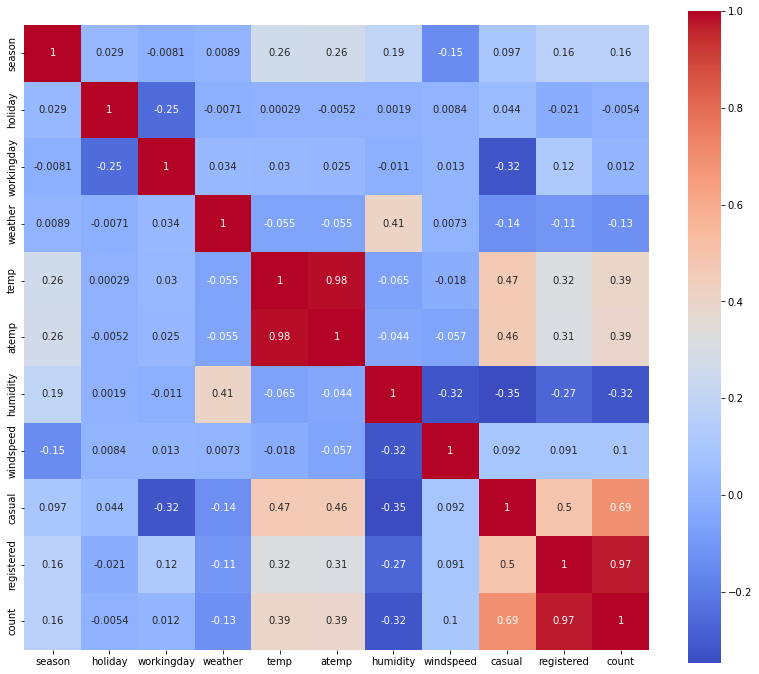

In [ ]:
plt.figure(figsize = (14, 12))
sns.heatmap(data.corr(method = 'pearson'), square = True, annot = True,
            cmap = 'coolwarm')


In [ ]:
'''
Observation:

-> Temperature and feeling Temperature (atemp) are highly correlated

-> Registered users is highly corelated with Total count and less corelated with casual count riders.
Registered users contribute to the total users.

-> There is a weak correlation between number of bike riders with weather and season

'''

'\nObservation:\n-> From the corelation plot, humidity shows a high corelation with weather\n-> Count of casual/registered users is highly corelated with temperature\n\n\n'

# HYPOTHESIS TESTING

# Q1: Is there any significant difference between the number of bike rides on Weekends and weekdays?

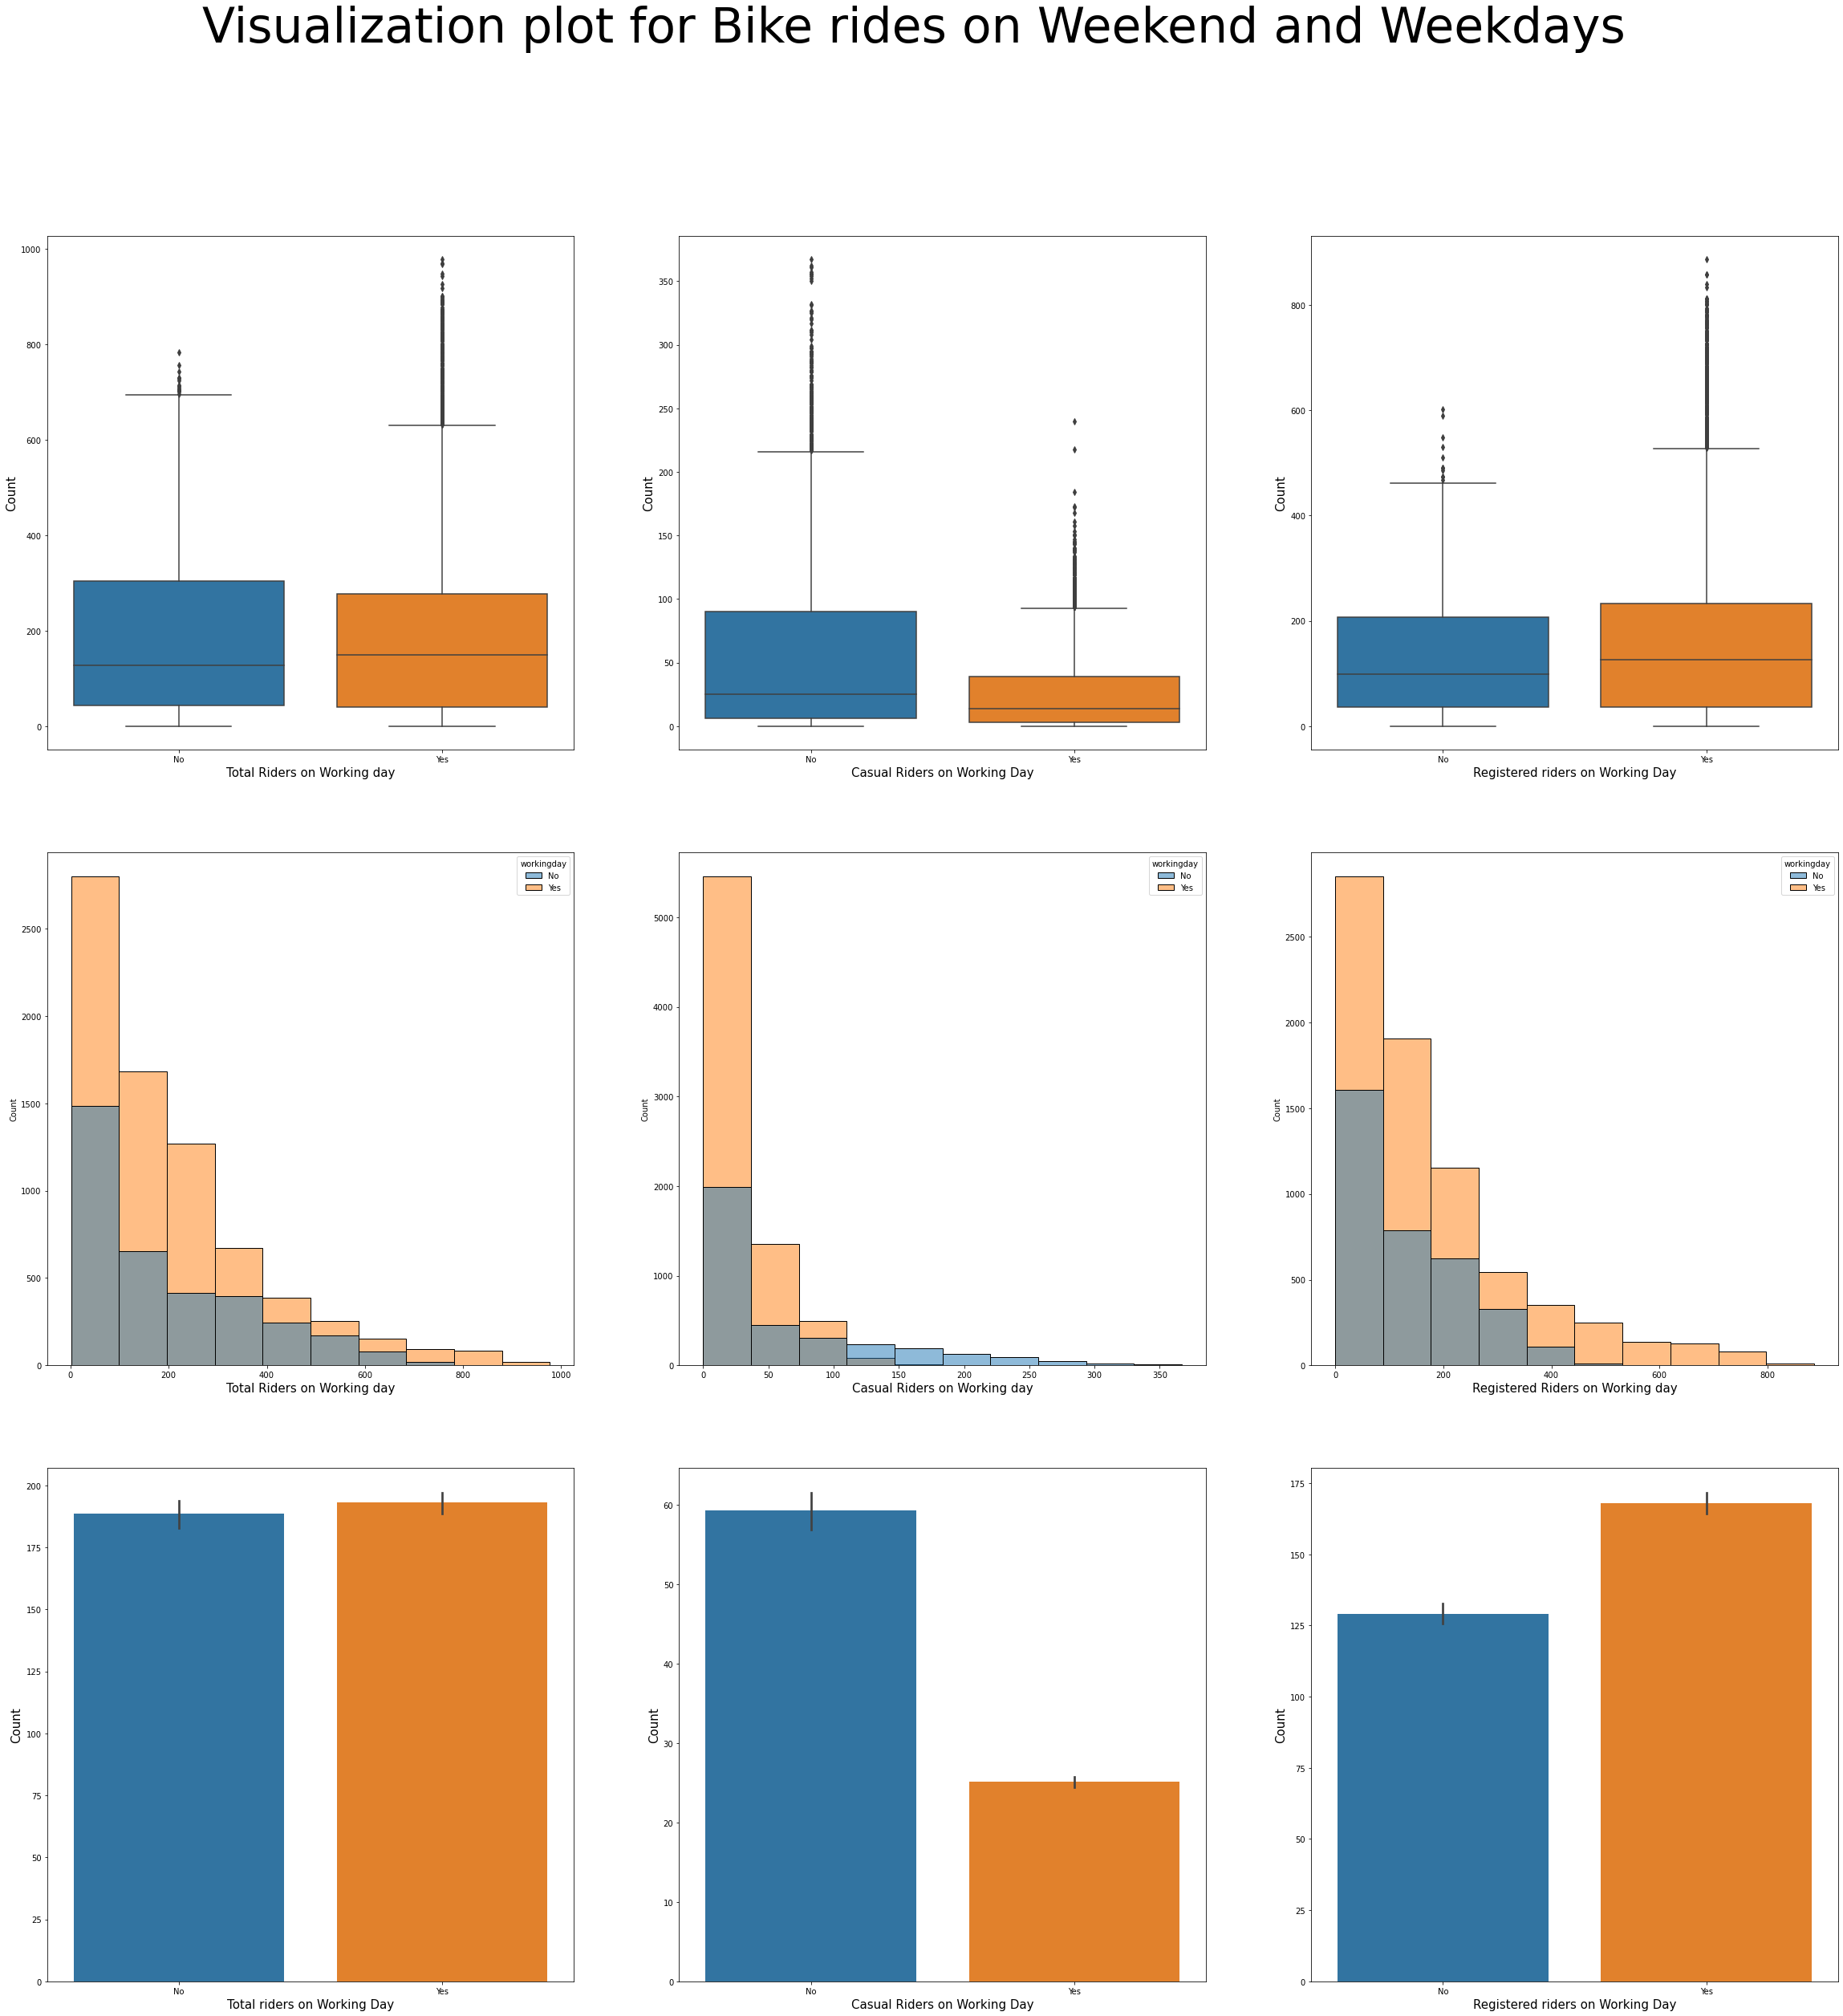

'\nFrom the plots, there is no such difference in rental bike rides on Weekends or Workingdays\nCount of rental bikes rides has more Outliers in case of Weekdays than on weekends\n\n'

In [ ]:
plt.figure(figsize = (40, 40))
plt.suptitle('Visualization plot for Bike rides on Weekend and Weekdays',
             fontsize = 60)

plt.subplot(3, 3, 1)
sns.boxplot(x = 'workingday', y = 'count', data = data)
plt.xlabel('Total Riders on Working day', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.subplot(3, 3, 2)
sns.boxplot(x = 'workingday', y = 'casual', data = data)
plt.xlabel('Casual Riders on Working Day', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.subplot(3, 3, 3)
sns.boxplot(x = 'workingday', y = 'registered', data = data)
plt.xlabel('Registered riders on Working Day', fontsize = 15)
plt.ylabel('Count', fontsize = 15)


plt.subplot(3, 3, 4)
sns.histplot(data = data, x = 'count',bins = 10, hue = 'workingday')
plt.xlabel('Total Riders on Working day', fontsize = 15)

plt.subplot(3, 3, 5)
sns.histplot(data = data, x = 'casual',bins = 10, hue = 'workingday')
plt.xlabel('Casual Riders on Working day', fontsize = 15)


plt.subplot(3, 3, 6)
sns.histplot(data = data, x = 'registered',bins = 10, hue = 'workingday')
plt.xlabel('Registered Riders on Working day', fontsize = 15)


plt.subplot(3, 3, 7)
sns.barplot(data = data, x = 'workingday', y = 'count', estimator = np.mean)
plt.xlabel('Total riders on Working Day', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.subplot(3, 3, 8)
sns.barplot(data = data, x = 'workingday', y = 'casual', estimator = np.mean)
plt.xlabel('Casual Riders on Working Day', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.subplot(3, 3, 9)
sns.barplot(data = data, x = 'workingday', y = 'registered', estimator = np.mean)
plt.xlabel('Registered riders on Working Day', fontsize = 15)
plt.ylabel('Count', fontsize = 15)


plt.show()

'''
From the plots, there is no such difference in rental bike rides on Weekends or Workingdays
The median number of Total Count, Casual and Registered Rental bikes rides is almost same in both the cases
Weekdays and weekends

'''

In [ ]:
#Question 1: Is there any significant difference between the number of bike rides on Weekends and weekdays?

#Based on the given problem the hypothesis is,

##Ho: There is NO significant difference between the number of bike rides on Weekends and weekdays
#Ha: There is a significant difference between the number of bike rides on Weekends and weekdays

from scipy.stats import ttest_ind

#Given samples of count of bikes rides on weekend(b) and weekdays(a)

a = data[data["workingday"] == 'Yes']["count"]
b = data[data["workingday"] == 'No']["count"]

alpha = 0.05#significance level), confidence_level = 95%



#Performing 2 sample T test
test_statistic, pvalue = ttest_ind(a, b)

print('alpha: ', alpha)
print("Test statistic:", test_statistic)
print("p-value:", pvalue)

print()
print('OBSERVATION:')
if pvalue < alpha:
    print(f'Since p-value {pvalue} is LESS than the significance level (alpha), we reject the null hypothesis.',
        'At 95% confidence level There is a significant difference between the number of bike rides on Weekends and weekdays')
else:
    print(f'Since p-value {pvalue} is MORE than the significance level (alpha): 0.05, we fail to reject the null hypothesis.',
    '   Thus at 95% confidence level There is NO ignificant difference between the number of bike rides on Weekends and weekdays')



alpha:  0.05
Test statistic: 1.2096277376026694
p-value: 0.22644804226361348

OBSERVATION:
Since p-value 0.22644804226361348 is MORE than the significance level (alpha): 0.05, we fail to reject the null hypothesis.    Thus at 95% confidence level There is NO ignificant difference between the number of bike rides on Weekends and weekdays


# Q2: Is there any significant difference between the number of bike rides on Holidays?

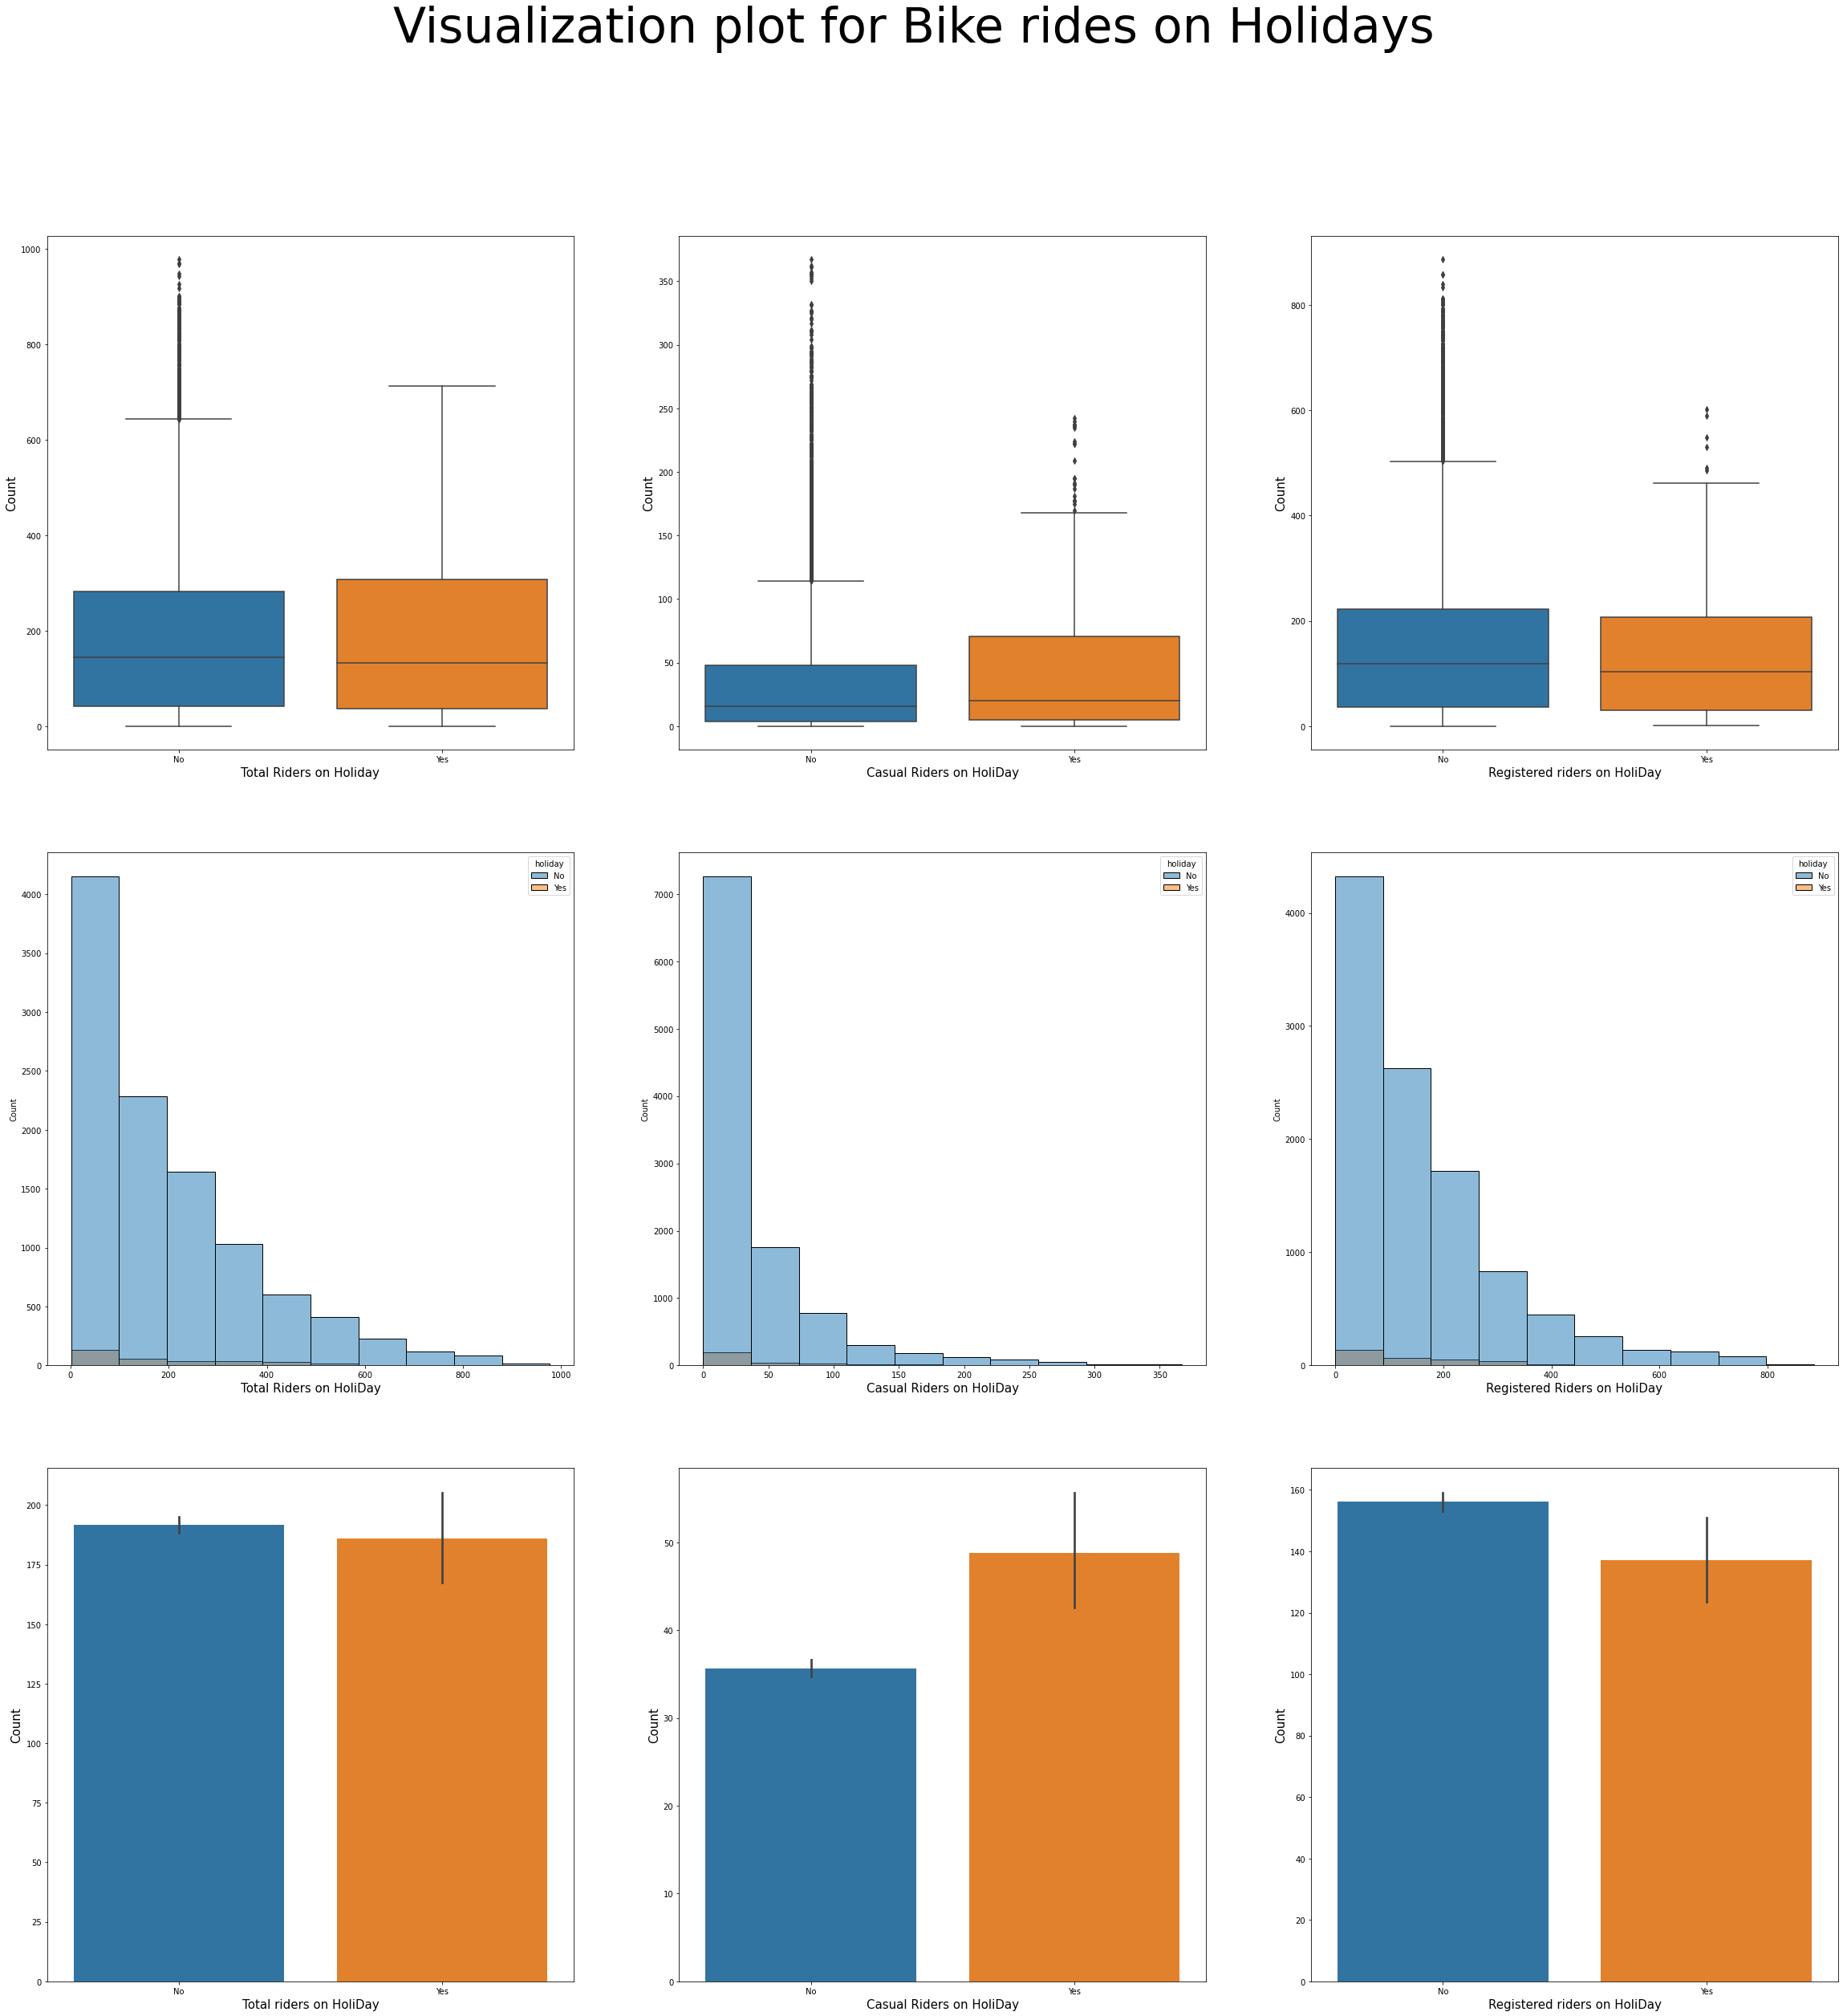

'\nOBSERVATION:\n\nThe median number of Total Count, Casual and Registered Rental bikes rides is almost same in both the cases\n\n'

In [ ]:
plt.figure(figsize = (40, 40))
plt.suptitle('Visualization plot for Bike rides on Holidays', fontsize = 60)

plt.subplot(3, 3, 1)
sns.boxplot(x = 'holiday', y = 'count', data = data)
plt.xlabel('Total Riders on Holiday', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.subplot(3, 3, 2)
sns.boxplot(x = 'holiday', y = 'casual', data = data)
plt.xlabel('Casual Riders on HoliDay', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.subplot(3, 3, 3)
sns.boxplot(x = 'holiday', y = 'registered', data = data)
plt.xlabel('Registered riders on HoliDay', fontsize = 15)
plt.ylabel('Count', fontsize = 15)


plt.subplot(3, 3, 4)
sns.histplot(data = data, x = 'count',bins = 10, hue = 'holiday')
plt.xlabel('Total Riders on HoliDay', fontsize = 15)

plt.subplot(3, 3, 5)
sns.histplot(data = data, x = 'casual',bins = 10, hue = 'holiday')
plt.xlabel('Casual Riders on HoliDay', fontsize = 15)


plt.subplot(3, 3, 6)
sns.histplot(data = data, x = 'registered',bins = 10, hue = 'holiday')
plt.xlabel('Registered Riders on HoliDay', fontsize = 15)


plt.subplot(3, 3, 7)
sns.barplot(data = data, x = 'holiday', y = 'count', estimator = np.mean)
plt.xlabel('Total riders on HoliDay', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.subplot(3, 3, 8)
sns.barplot(data = data, x = 'holiday', y = 'casual', estimator = np.mean)
plt.xlabel('Casual Riders on HoliDay', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.subplot(3, 3, 9)
sns.barplot(data = data, x = 'holiday', y = 'registered', estimator = np.mean)
plt.xlabel('Registered riders on HoliDay', fontsize = 15)
plt.ylabel('Count', fontsize = 15)


plt.show()

'''
OBSERVATION:

The median number of Total Count, Casual and Registered Rental bikes rides is almost same in both the cases

'''

In [ ]:
#Question 2: Is there any significant difference between the number of bike rides on Holidays?

#Based on the given problem the hypothesis is,

##Ho: There is NO significant difference between the number of bike rides on Holidays
#Ha: There is a significant difference between the number of bike rides on Holidays

from scipy.stats import ttest_ind

#Given samples of count of bikes rides on weekend(b) and weekdays(a)

a = data[data["holiday"] == 'Yes']["count"]
b = data[data["holiday"] == 'No']["count"]

alpha = 0.05#significance level), confidence_level = 95%



#Performing 2 sample T test
test_statistic, pvalue = ttest_ind(a, b)
print('alpha: ', alpha)
print("Test statistic:", test_statistic)
print("p-value:", pvalue)
print()
print('OBSERVATION:')
if pvalue < alpha:
    print(f'Since p-value {pvalue} is LESS than the significance level (alpha), we reject the null hypothesis.',
        'At 95% confidence level There is a significant difference between the number of bike rides on Holidays')
else:
    print(f'Since p-value {pvalue} is MORE than the significance level (alpha): 0.05, we fail to reject the null hypothesis.',
        'Thus at 95% confidence level There is NO ignificant difference between the number of bike rides on Holidays')


alpha:  0.05
Test statistic: -0.5626388963477119
p-value: 0.5736923883271103

OBSERVATION:
Since p-value 0.5736923883271103 is MORE than the significance level (alpha): 0.05, we fail to reject the null hypothesis. Thus at 95% confidence level There is NO ignificant difference between the number of bike rides on Holidays


# Q3: Is the demand of bicycles on rent is the same for all Weather conditions?

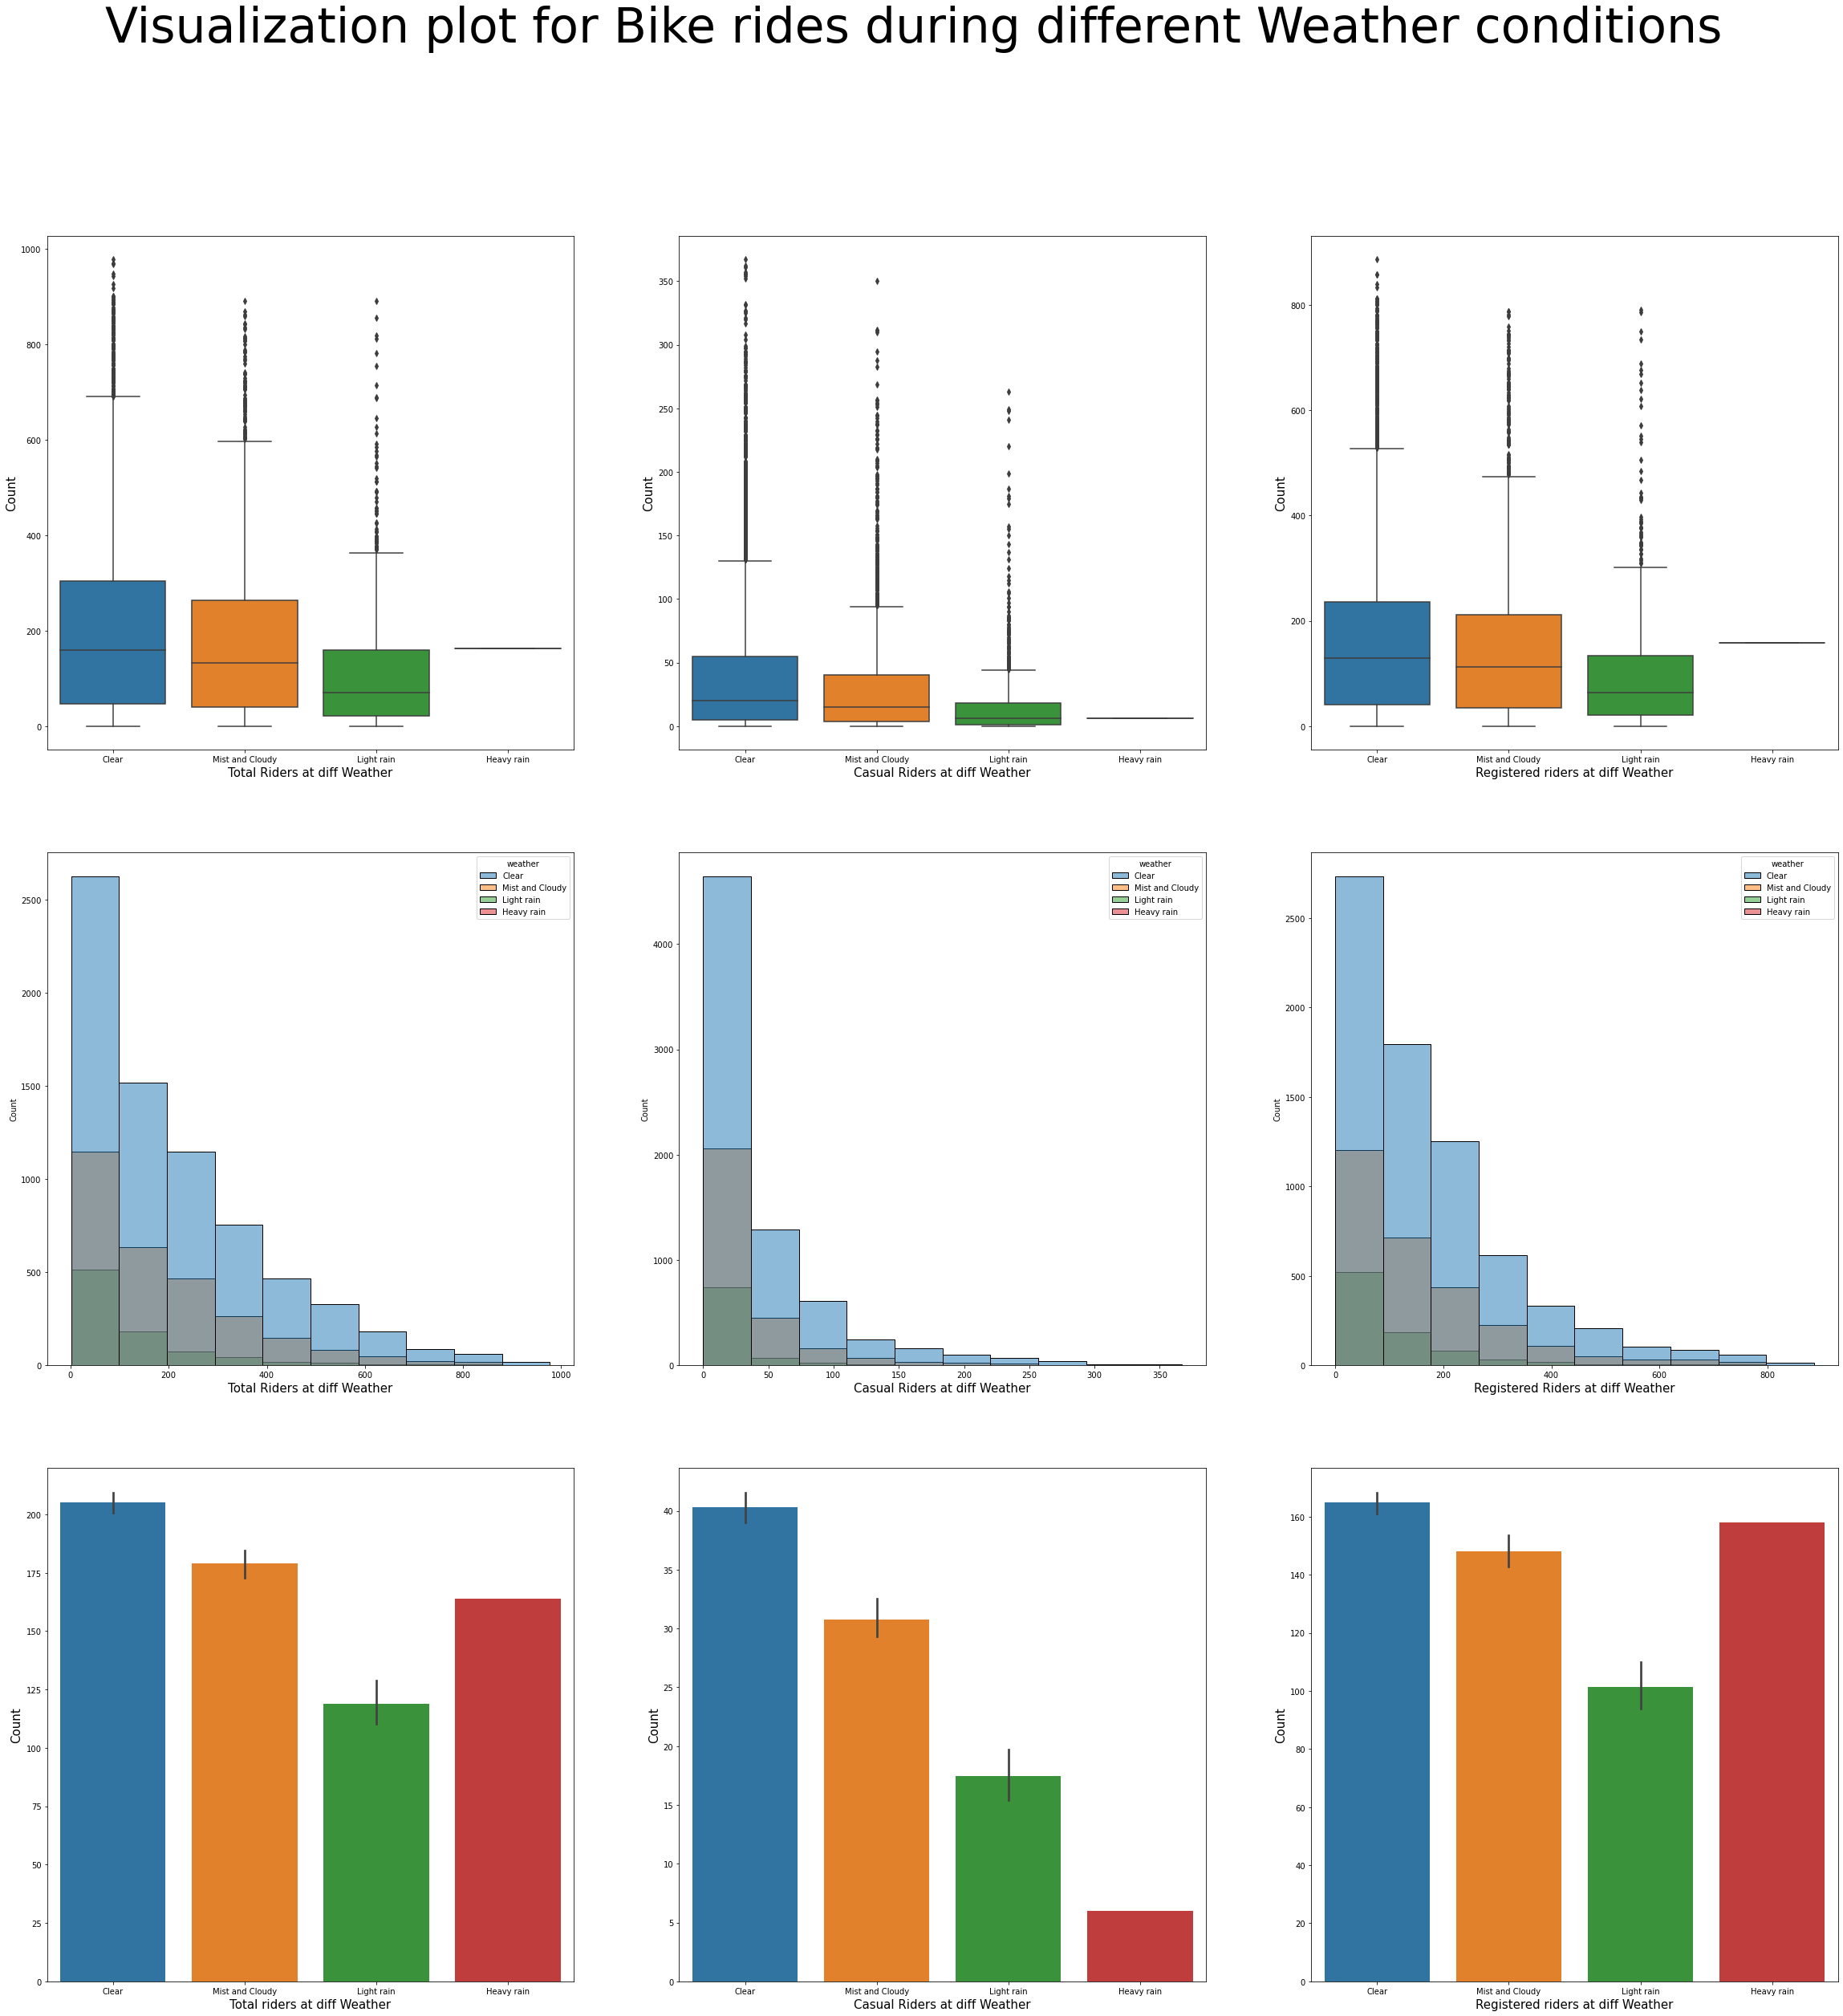

'\nOBSERVATION:\n\n-> The median value for number of bike riders is more when the weather is Clear followed by Mist and Cloudy.\nThe count decreases during Rainfall\n-> The median value for the number of bike riders is highest in Summer and Fall then drops in Winter and Spring\n(Same was observed on Linechart)\n\n\n'

In [ ]:
plt.figure(figsize = (40, 40))
plt.suptitle('Visualization plot for Bike rides during different Weather conditions', fontsize = 60)

plt.subplot(3, 3, 1)
sns.boxplot(x = 'weather', y = 'count', data = data)
plt.xlabel('Total Riders at diff Weather', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.subplot(3, 3, 2)
sns.boxplot(x = 'weather', y = 'casual', data = data)
plt.xlabel('Casual Riders at diff Weather', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.subplot(3, 3, 3)
sns.boxplot(x = 'weather', y = 'registered', data = data)
plt.xlabel('Registered riders at diff Weather', fontsize = 15)
plt.ylabel('Count', fontsize = 15)


plt.subplot(3, 3, 4)
sns.histplot(data = data, x = 'count',bins = 10, hue = 'weather')
plt.xlabel('Total Riders at diff Weather', fontsize = 15)

plt.subplot(3, 3, 5)
sns.histplot(data = data, x = 'casual',bins = 10, hue = 'weather')
plt.xlabel('Casual Riders at diff Weather', fontsize = 15)


plt.subplot(3, 3, 6)
sns.histplot(data = data, x = 'registered',bins = 10, hue = 'weather')
plt.xlabel('Registered Riders at diff Weather', fontsize = 15)


plt.subplot(3, 3, 7)
sns.barplot(data = data, x = 'weather', y = 'count')
plt.xlabel('Total riders at diff Weather', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.subplot(3, 3, 8)
sns.barplot(data = data, x = 'weather', y = 'casual')
plt.xlabel('Casual Riders at diff Weather', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.subplot(3, 3, 9)
sns.barplot(data = data, x = 'weather', y = 'registered')
plt.xlabel('Registered riders at diff Weather', fontsize = 15)
plt.ylabel('Count', fontsize = 15)


plt.show()

'''
OBSERVATION:

-> The median value for number of bike riders is more when the weather is Clear followed by Mist and Cloudy.
The count decreases during Rainfall
-> The median value for the number of bike riders is highest in Summer and Fall then drops in Winter and Spring
(Same was observed on Linechart)


'''

In [ ]:
#Question 3: Check if the demand of bicycles on rent is the same for different Weather conditions?

#Based on the given problem the hypothesis is,

##Ho: The demand of bicycles on rent is the same for different Weather conditions
##Ha: The demand of bicycles on rent is NOT the same for different Weather conditions

from scipy.stats import f_oneway

#Given samples of count of bikes rides on different weather conditions

WC1 = data[data["weather"] == 'Clear']["count"]
WC2 = data[data["weather"] == 'Mist and Cloudy']["count"]
WC3 = data[data["weather"] == 'Light rain']["count"]
WC4 = data[data["weather"] == 'Heavy rain']["count"]

alpha = 0.05#significance level

#Performin ANOVA Test
test_statistic, pvalue = f_oneway(WC1, WC2, WC3, WC4)
print('alpha: ', alpha)
print("Test statistic:", test_statistic)
print("p-value:", pvalue)


print()
print('OBSERVATION:')
if pvalue < alpha:
    print(f'Since p-value {pvalue} is LESS than the significance level (alpha), we reject the null hypothesis.',
        'At 95% confidence level The demand of bicycles on rent is different for different Weather conditions')
else:
    print(f'Since p-value {pvalue} is MORE than the significance level (alpha): 0.05, we fail to reject the null hypothesis.',
        'Thus at 95% confidence level The demand of bicycles on rent is same at all Weather conditions')


alpha:  0.05
Test statistic: 65.53024112793271
p-value: 5.482069475935669e-42

OBSERVATION:
Since p-value 5.482069475935669e-42 is LESS than the significance level (alpha), we reject the null hypothesis. At 95% confidence level The demand of bicycles on rent is different for different Weather conditions


# Q4: Is the demand of bicycles on rent is the same at all Seasons?

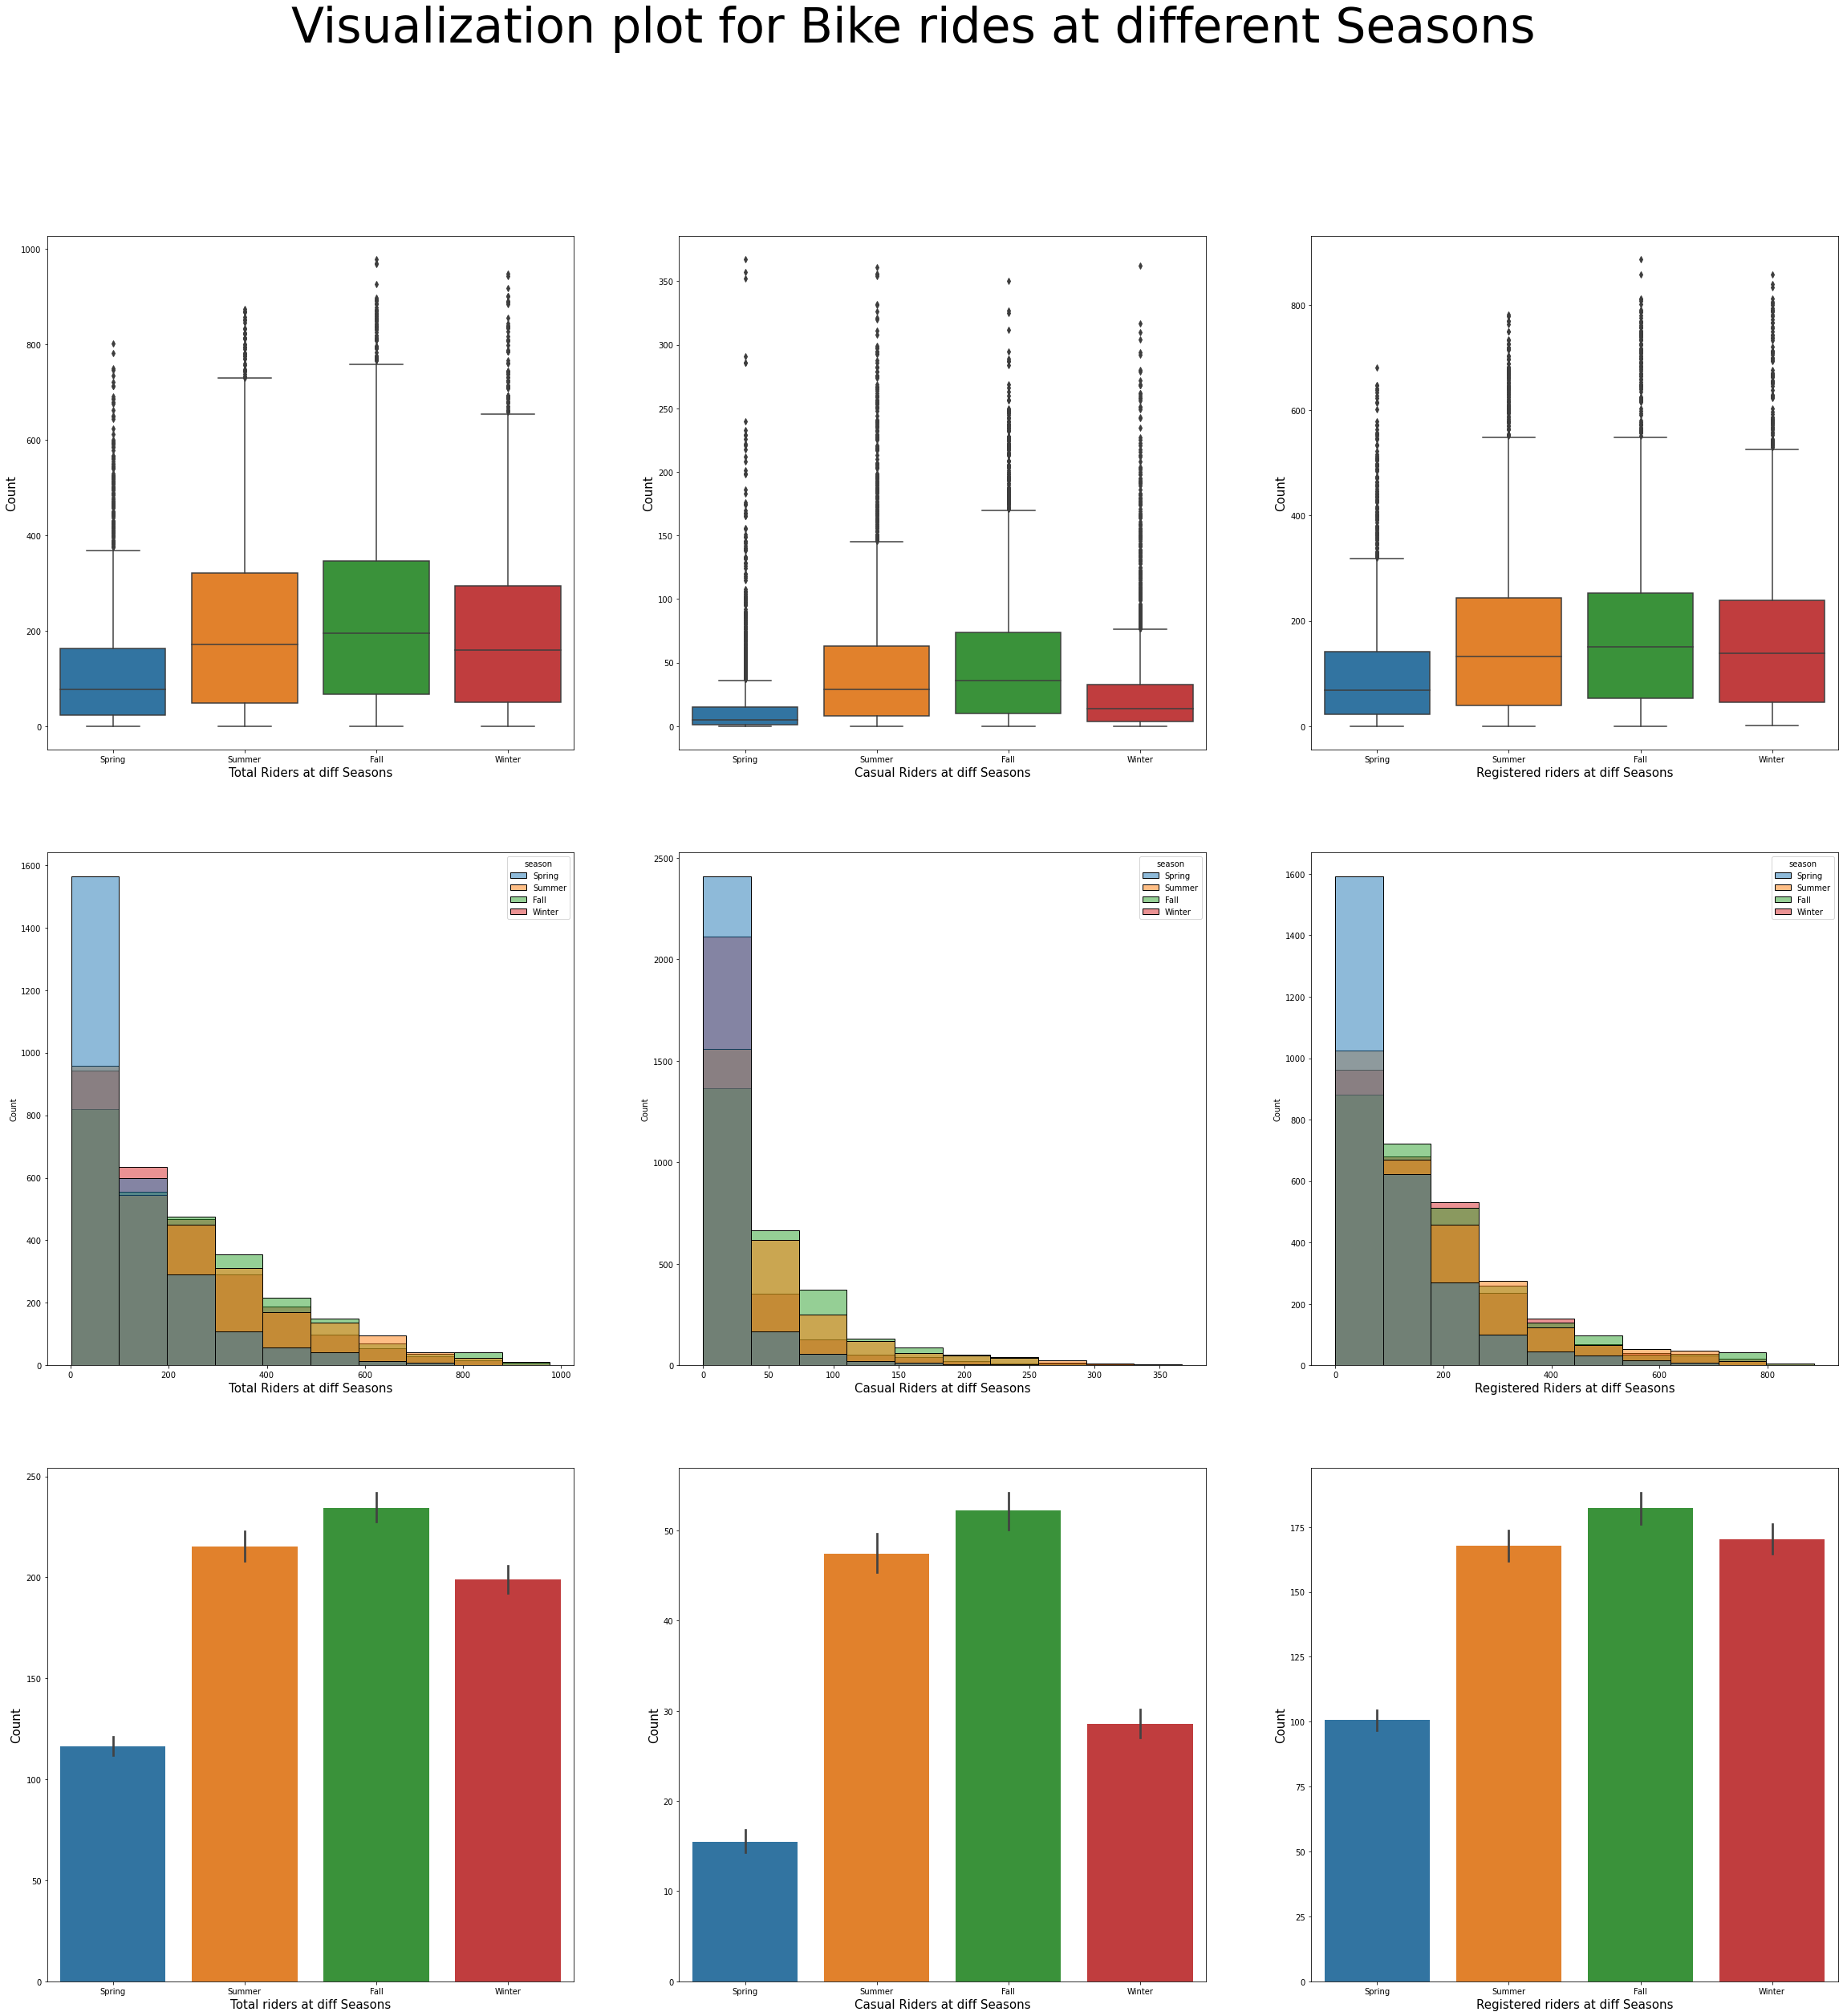

'\nOBSERVATION:\n\n-> The median value for the number of bike riders is highest in Summer and Fall then drops in Winter and Spring\n(Same was observed on Linechart)\n->The mean value for the number of bike riders is highest in Summer and Fall then drops in Winter and Spring\n(Same was observed on Linechart)\n'

In [ ]:
plt.figure(figsize = (40, 40))
plt.suptitle('Visualization plot for Bike rides at different Seasons', fontsize = 60)

plt.subplot(3, 3, 1)
sns.boxplot(x = 'season', y = 'count', data = data)
plt.xlabel('Total Riders at diff Seasons', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.subplot(3, 3, 2)
sns.boxplot(x = 'season', y = 'casual', data = data)
plt.xlabel('Casual Riders at diff Seasons', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.subplot(3, 3, 3)
sns.boxplot(x = 'season', y = 'registered', data = data)
plt.xlabel('Registered riders at diff Seasons', fontsize = 15)
plt.ylabel('Count', fontsize = 15)


plt.subplot(3, 3, 4)
sns.histplot(data = data, x = 'count',bins = 10, hue = 'season')
plt.xlabel('Total Riders at diff Seasons', fontsize = 15)

plt.subplot(3, 3, 5)
sns.histplot(data = data, x = 'casual',bins = 10, hue = 'season')
plt.xlabel('Casual Riders at diff Seasons', fontsize = 15)


plt.subplot(3, 3, 6)
sns.histplot(data = data, x = 'registered',bins = 10, hue = 'season')
plt.xlabel('Registered Riders at diff Seasons', fontsize = 15)


plt.subplot(3, 3, 7)
sns.barplot(data = data, x = 'season', y = 'count', estimator = np.mean)
plt.xlabel('Total riders at diff Seasons', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.subplot(3, 3, 8)
sns.barplot(data = data, x = 'season', y = 'casual', estimator = np.mean)
plt.xlabel('Casual Riders at diff Seasons', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.subplot(3, 3, 9)
sns.barplot(data = data, x = 'season', y = 'registered', estimator = np.mean)
plt.xlabel('Registered riders at diff Seasons', fontsize = 15)
plt.ylabel('Count', fontsize = 15)


plt.show()


'''
OBSERVATION:

-> The median value for the number of bike riders is highest in Summer and Fall then drops in Winter and Spring
(Same was observed on Linechart)
->The mean value for the number of bike riders is highest in Summer and Fall then drops in Winter and Spring
(Same was observed on Linechart)
'''


In [ ]:
#Question 4: Check if the demand of bicycles on rent is the same for different Seasons?

#Based on the given problem the hypothesis is,

##Ho: The demand of bicycles on rent is the same for all Seasons
##Ha: The demand of bicycles on rent is different for different seasons

from scipy.stats import f_oneway

#Given samples of count of bikes rides on different weather conditions

S1 = data[data["season"] == 'Spring']["count"]
S2 = data[data["season"] == 'Summer']["count"]
S3 = data[data["season"] == 'Fall']["count"]
S4 = data[data["season"] == 'Winter']["count"]

alpha = 0.05#significance level

#Performin ANOVA Test
test_statistic, pvalue = f_oneway(S1, S2, S3, S4)
print('alpha: ', alpha)
print("Test statistic:", test_statistic)
print("p-value:", pvalue)
print()
print('OBSERVATION:')
if pvalue < alpha:
    print(f'Since p-value {pvalue} is LESS than the significance level (alpha), we reject the null hypothesis.',
        'At 95% confidence level the demand of bicycles on rent is different for different Seasons')
else:
    print(f'Since p-value {pvalue} is MORE than the significance level (alpha): 0.05, we fail to reject the null hypothesis.',
        'Thus at 95% confidence level the demand of bicycles on rent is same at all Seasons')

alpha:  0.05
Test statistic: 236.94671081032106
p-value: 6.164843386499654e-149

OBSERVATION:
Since p-value 6.164843386499654e-149 is LESS than the significance level (alpha), we reject the null hypothesis. At 95% confidence level the demand of bicycles on rent is different for different Seasons


# Dependent of weather on season?

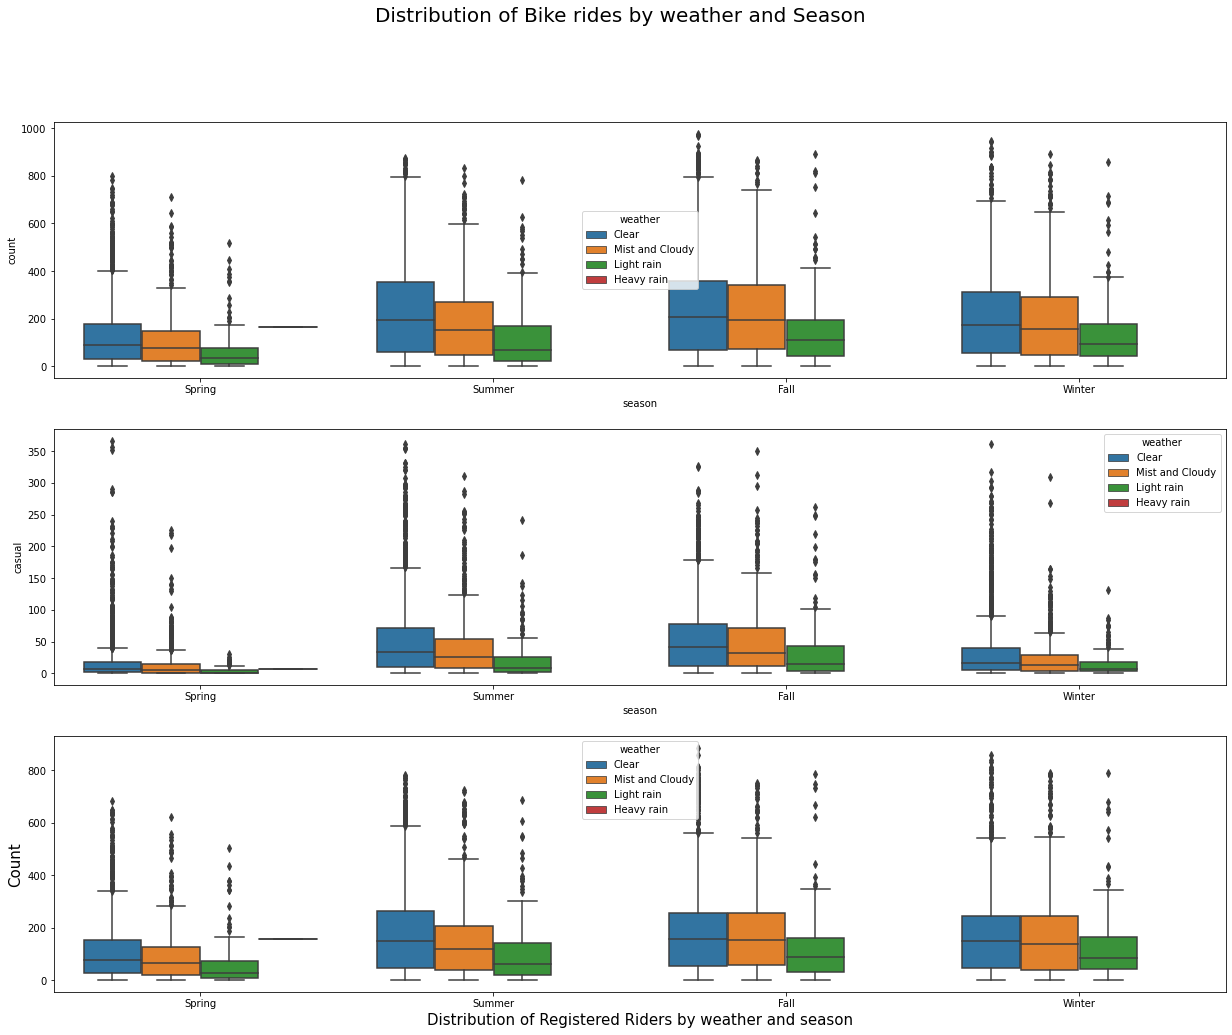

'\nOBSERVATION:\n\n-> The median value for the number of bike riders is highest in Summer and Fall then drops in Winter and Spring\n(Same was observed on Linechart)\n\n'

In [ ]:
fig, axes = plt.subplots(3,1,figsize=(21,16))
plt.suptitle('Distribution of Bike rides by weather and Season', fontsize = 20)

sns.boxplot(x = 'season', y = 'count', data = data, hue = 'weather', ax = axes[0])
plt.xlabel('Distribution of Total Riders by weather and season', fontsize = 15)
plt.ylabel('Count', fontsize = 15)


sns.boxplot(x = 'season', y = 'casual', data = data,hue = 'weather', ax = axes[1] )
plt.xlabel('Distribution of Casual Riders by weather and season', fontsize = 15)
plt.ylabel('Count', fontsize = 15)


sns.boxplot(x = 'season', y = 'registered', data = data, hue = 'weather', ax = axes[2])
plt.xlabel('Distribution of Registered Riders by weather and season', fontsize = 15)
plt.ylabel('Count', fontsize = 15)


plt.show()

'''
OBSERVATION:

-> The median value for the number of bike riders is highest in Clear followed by Mist and Cloudy weather

'''


In [ ]:
WeatherSeason = pd.crosstab(data["season"], data["weather"], margins = True)

In [ ]:
WeatherSeason
#We will remove 'Heavy rain' column since the datapoints is less than 5

weather,Clear,Heavy rain,Light rain,Mist and Cloudy,All
season,,,,,
Fall,1930,0,199,604,2733
Spring,1759,1,211,715,2686
Summer,1801,0,224,708,2733
Winter,1702,0,225,807,2734
All,7192,1,859,2834,10886


In [ ]:
df = data[data['weather'] != 'Heavy rain']
Test_Data = pd.crosstab(df["season"], df["weather"], margins = True)
Test_Data

weather,Clear,Light rain,Mist and Cloudy,All
season,,,,
Fall,1930,199,604,2733
Spring,1759,211,715,2685
Summer,1801,224,708,2733
Winter,1702,225,807,2734
All,7192,859,2834,10885


In [ ]:
pd.crosstab(df["season"], df["weather"], normalize = "index")

weather,Clear,Light rain,Mist and Cloudy
season,,,
Fall,0.706184,0.072814,0.221003
Spring,0.655121,0.078585,0.266294
Summer,0.658983,0.081961,0.259056
Winter,0.622531,0.082297,0.295172


In [ ]:
#Question 5: Check if the weather conditions are significantly different during different Seasons?

#To find if there is any relation between weather and seasons we will use chi2 test for independence

##Ho: The weather is not dependent on Seasons
##Ha: The weather is dependent on Seasons

from scipy.stats import chi2_contingency


alpha = 0.05

test_statistic, pvalue, dof, expected = chi2_contingency(Test_Data)
print('alpha: ', alpha)
print("Test statistic:", test_statistic)
print("p-value:", pvalue)

print()
print('OBSERVATION:')
if pvalue < alpha:
    print(f'Since p-value {pvalue} is LESS than the significance level (alpha), we reject the null hypothesis.',
        'At 95% confidence level the weather is dependent on Seasons')
else:
    print(f'Since p-value {pvalue} is MORE than the significance level (alpha): 0.05, we fail to reject the null hypothesis.',
        'Thus at 95% confidence level the weather is not dependent on Seasons')



alpha:  0.05
Test statistic: 46.10145731073249
p-value: 6.664576536706683e-06

OBSERVATION:
Since p-value 6.664576536706683e-06 is LESS than the significance level (alpha), we reject the null hypothesis. At 95% confidence level the weather is dependent on Seasons


# OVERALL OBSERVATIONS

In [ ]:
'''
OVERALL OBSERVATION:
-> The Yulu dataset is the information of number of bike riders considering the environmental factors and holidays
with every information given

-> From basic observations: The dataset has 10886 rows with 12 columns

->There were no null values observed in the dataset

->Yulu Dataset has information from 01st Jan 2011 to 19th Dec 2012 (~ 2years)

->Outliers were observed in Count, casual, registered and windspeed variables.
Total 2.8% of Outliers in "COUNT", column
Total 6.9% of Outliers in "CASUAL", column
Total 3.9% of Outliers in "REGISTERED", column were found out statistically using boxplot
There might be an increase in the number of rides at certian period which contributed to an outliers


-> The distribution plot of all variables are skewed, hence they are not normally distributed
-> The number of bike riders in all season is approximetely same
-> Around 67% rides when the weather is Clear and almost none when there is heavy rains.
-> People mostly ride during working days and very less during holidays or weekends
-> 68% ride during working days and 97% ride when there is NO Holidays

-> The mean of the temperature is 20 degree Celsius
-> The mean of the Feeling temperature is 24 degree Celsius
-> The mean of the Humidity is 62 %


-> There is an increase in trend in number of total, casual and registered bike riders
-> The number of bike riders increase in spring to summer season then drop at mid-fall to Winter and then again increases.

-> Temperature and feeling Temperature (atemp) are highly correlated

-> Registered users is highly corelated with Total count and less corelated with casual count riders.
Registered users contribute to the total users.

-> There is a weak correlation between number of bike riders with weather and season


'''



# RECOMMENDATIONS

In [ ]:
'''

-> From 2 sample T test, we have observed no significant difference between the number of bike rides on working
days and on Holidays.
But from statistics, People mostly ride during working days and very less during holidays or weekends
During holidays, Yulu can keep special discounts to increase the revenue

->Using ANOVA test on Weather conditions we have observed that at 95% confidence level the demand of bicycles on rent
is different for different Weather conditions. People mostly use when the weather is Clear Yulu can increase the
number of bikes during clear Weather.


-> Using ANOVA test st different seasons we have observed that at 95% confidence level the demand of bicycles is highest
in Summer and Fall then drops in Winter and Spring. Yulu should increase the capacity during different seasons
based on the customer's usage


-> Additionally Yulu should consider the Customer's Ocuupation to understand if Yulu is mostly used by customers
during office hours? If yes Yulu can increase the capacity at such locations

-> Information is required for uasge for distance travelled and speed range


'''